In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

### Выполнил: Просеков Алексей (PROSEKOV-AV)

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



### Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей.

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии.  
Ссылка на шаблон к презентации: лежит рядом с заданием в классруме.  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода или злоупотреблять скринами блокнота не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы.

### Вопросы, на которые нужно ответить в презентации:
- Сколько рейтинговых групп представлено в данных?
- Какие оценки пользователи ставят чаще всего?
- Какие оценки пользователи ставят в среднем?
- В какие годы были запущены шоу?
- Можно ли сделать вывод, что 2017 год успешнее для Netflix?
- В каких рейтинговых группах запущены шоу на Netflix?
- Выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :)

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией.

Любой хороший Data Scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

### Полезные замечания и советы
- Следите за тем, чтобы все графики на слайдах можно было прочитать даже без ваших комментариев;
- Не нужно делать просто текстовые слайды;
- Не обязательно ограничиваться представленным датасетом. У вас есть весь интернет, чтобы найти дополнительную информацию и проверить ваши гипотезы. Дерзайте!


## Решение

Скачайте данные: они лежат рядом с этим файлом в классруме.
Загрузите данные, выполнив код ниже.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NetflixShows.csv to NetflixShows.csv


In [ ]:
data = pd.read_csv("NetflixShows.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

In [ ]:
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN


### Смотрим, что загрузилось:

- Посчитаем, сколько записей
- Посмотрим, какого типа данные
- Проверим, есть ли пропуски

Посмотрим информацию о датасете

In [ ]:
data.info() # информация о данных в DataFrame:
#сколько строк,
#какие данные в столбцах,
#сколько пропущенных значений (Nan-values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   release year       1000 non-null   int64  
 4   user rating score  605 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


Посчитаем, сколько записей в данных.

Помогает метод count()

In [ ]:
data.count()

title                1000
rating               1000
ratingLevel           941
release year         1000
user rating score     605
dtype: int64

Посмотрим размер датафрейма

In [ ]:
data.shape

(1000, 5)

1000 строк на 5 столбцов(колонок)

In [ ]:
# Выводит сводку по количеству столбцов и их типам, но не по столбцам:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 5 entries, title to user rating score
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


In [ ]:
# Начнем проверять на пропуски!
# .isnull() - выдает табличку, где False - ячейка заполнена, True - ячейка пуста
data.isnull()

,title,rating,ratingLevel,release year,user rating score
0,False,False,False,False,False
1,False,False,False,False,True
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,False,False,False,False,True
997,False,False,False,False,True
998,False,False,False,False,True


In [ ]:
# Посчитаем сколько в датасете пропусков по столбцам

data.isnull().sum(axis=0)

title                  0
rating                 0
ratingLevel           59
release year           0
user rating score    395
dtype: int64

In [ ]:
# Всего пропусков по столбцам
data.isnull().sum().sum()

454

In [ ]:
# Количество строк в датафрейме
data.shape[0]

1000

In [ ]:
# Посмотрим количество пропущенных значений в столбце user rating score (оценки пользователей)
data['user rating score'].isnull().sum()

395

In [ ]:
# Посчитаем сколько в датасете пропусков в долях по  столбцу  user rating score в долях
data['user rating score'].isnull().sum()/data.shape[0]

0.395

39,5% пропусков дает вклад по user rating score - оценка пользователей.

In [ ]:
# Посчитаем сколько в датасете пропусков в долях по  столбцу  ratingLevel в долях
data['ratingLevel'].isnull().sum()/data.shape[0]

0.059

5,9% пропусков дает вклад по ratingLevel - описание рейтинговой группы и особенностей шоу.

Посмотрим распределение пропусков с использование карты

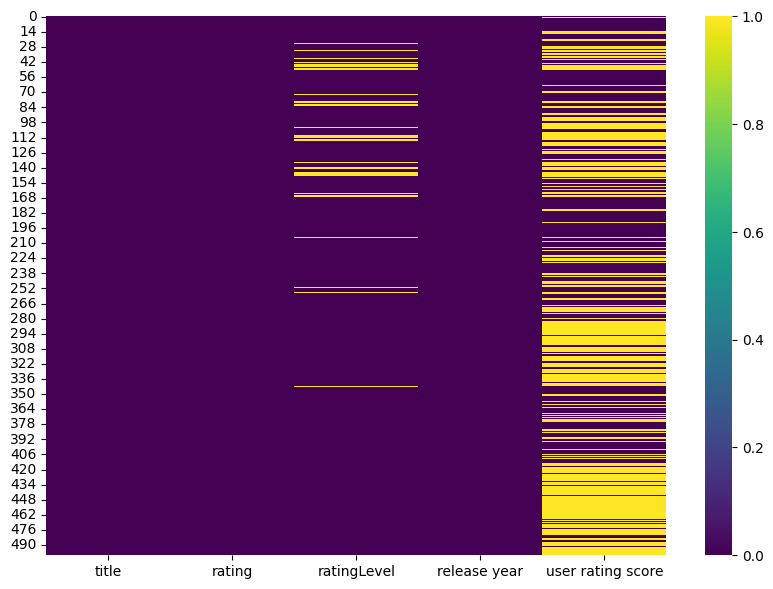

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns_heatmap = sns.heatmap(data.isnull())
fig, ax = plt.subplots(figsize=(10,7))
sns_heatmap = sns.heatmap(data.isnull(), xticklabels=True, cbar=True, cmap='viridis')
plt.show()

Из карты видно распределение пропусков в столбцах ratingLevel (описание рейтинговой группы и особенностей шоу) и user rating score (оценка пользователей)

In [ ]:
# Посмотрим количество пропусков  в столбце - user rating score (оценки пользователей) по распределению
#в рейтинговых группах rating
data_score_pass1=data[data['user rating score'].isnull()]['rating'].value_counts()
data_score_pass1

G           81
TV-MA       52
PG          51
TV-14       46
TV-Y        43
TV-G        28
TV-Y7-FV    28
TV-Y7       24
TV-PG       17
R           10
NR          10
PG-13        4
UR           1
Name: rating, dtype: int64

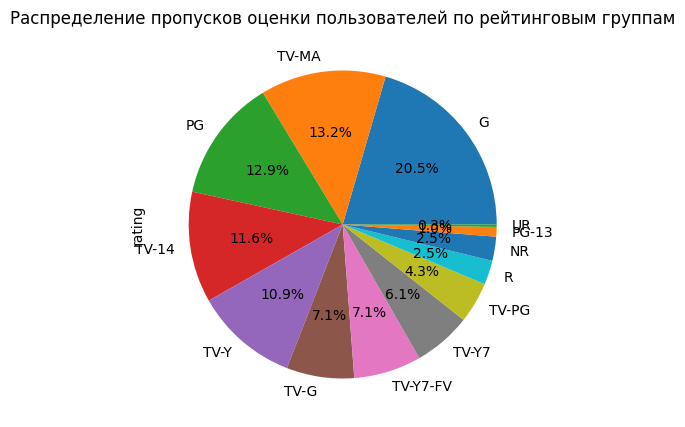

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
data_score_pass1.plot(kind='pie', y='points', autopct='%1.1f%%',
                      # colors = ['red', 'pink', 'steelblue'],
                      title='Распределение пропусков оценки пользователей по рейтинговым группам')
plt.show()


Всего пропущенных значений по оценкам пользователей 395. 20,5% пропусков дает шоу из группы G, описание рейтинговой группы (для широкой аудитории. подходит для всех возрастов.)

In [ ]:
# Посмотрим количество пропусков по годам
data_score_year=data[data['user rating score'].isnull()]['release year'].value_counts()
data_score_year

2016    92
2015    43
2017    39
2013    31
2014    31
2011    18
2012    18
2009    13
1998    13
1997    10
2001     9
2006     7
2002     7
2003     7
2010     7
2008     6
2007     5
2000     5
1991     5
1993     5
1976     4
2005     4
2004     4
1999     4
1982     3
1990     3
1989     1
1996     1
Name: release year, dtype: int64

In [ ]:
data_score_year_1 = data_score_year.to_frame(name='passes')
data_score_year_1

,passes
2016,92
2015,43
2017,39
2013,31
2014,31
2011,18
2012,18
2009,13
1998,13
1997,10


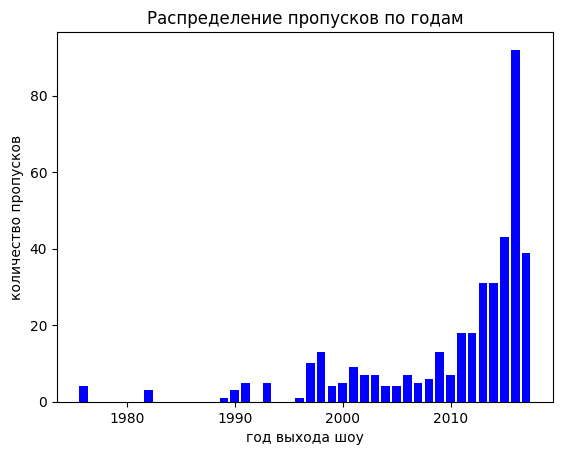

In [ ]:
plt.bar(data_score_year_1.index, data_score_year, align='center', color='b',)
# plt.bar(x, height, align='center', color='c', linewidth = 100)
plt.title('Распределение пропусков по годам')
plt.xlabel('год выхода шоу')
plt.ylabel('количество пропусков')
plt.show()

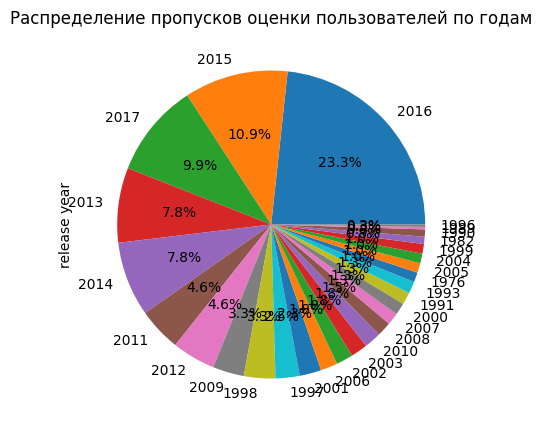

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
data_score_year.plot(kind='pie', y='points', autopct='%1.1f%%',
                      # colors = ['red', 'pink', 'steelblue'],
                      title='Распределение пропусков оценки пользователей по годам')
plt.show()

Вывод: Мы видим, что набольшее количество пропусков в оценках пользователей начинается с 2013 года, максимум пропущенных оценок в 2016 году - 92 пропуска (23%)

In [ ]:
# Удалим строки с пропусками по столбцу оценка пользователей и сохраним в новой переменной
df_not_pass = data.dropna(subset=['user rating score'])
df_not_pass


,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
...,...,...,...,...,...
986,Pok╠⌐mon: Indigo League,TV-Y,Suitable for all ages.,2000,74.0
988,Paddington,PG,mild action and rude humor,2014,70.0
991,Dawn of the Croods,TV-Y7,Suitable for children ages 7 and older,2017,72.0
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0


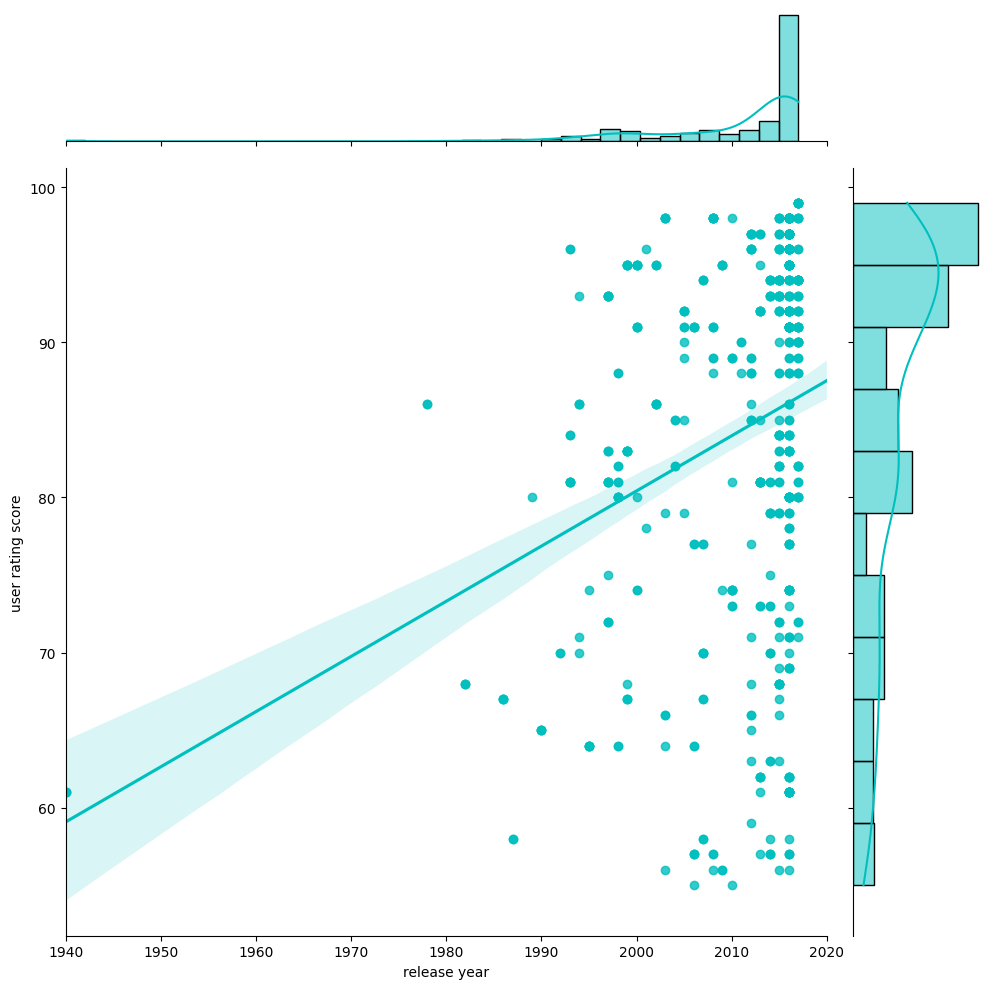

In [ ]:
# Построим график год выхода шоу от оценки пользователей после удаления пропусков
sns.jointplot(x="release year", y="user rating score", data=df_not_pass,
              kind="reg", truncate=False,
              xlim=(1940, 2020),
              color="c", height=10)

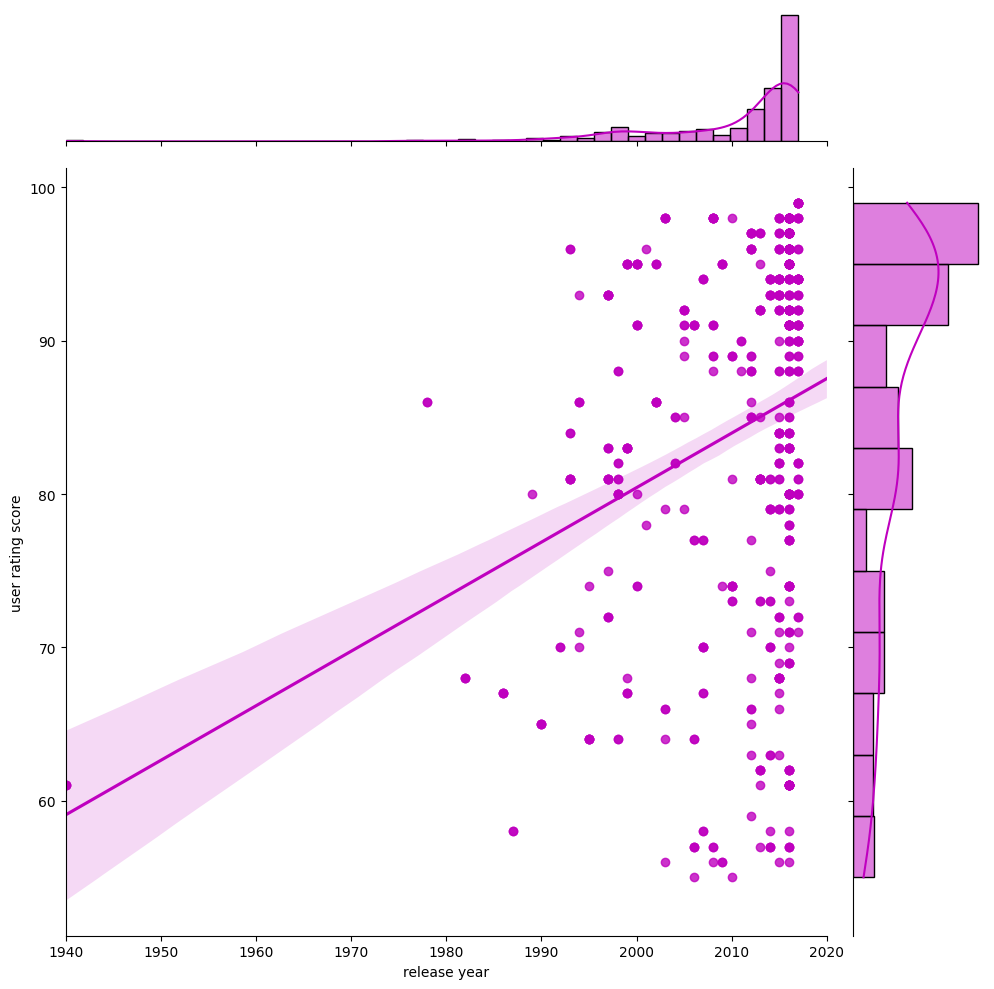

In [ ]:
# Построим график год выхода шоу от оценки пользователей до удаления пропусков
sns.jointplot(x="release year", y="user rating score", data=data,
              kind="reg", truncate=False,
              xlim=(1940, 2020),
              color="m", height=10)

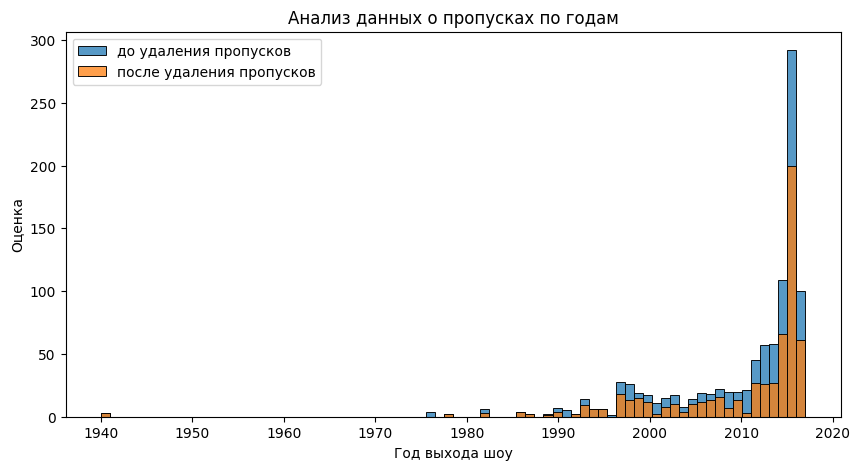

In [ ]:
# Построим диаграммы для анализ данных о пропусках по годам (до удаления и после)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10, 5))
ax = sns.histplot(data = data,
                  x='release year',
                  bins=78, label='до удаления пропусков')
ax = sns.histplot(data = df_not_pass,
                  x='release year',
                  bins=78, label='после удаления пропусков')
plt.legend()

plt.title('Анализ данных о пропусках по годам')
plt.xlabel('Год выхода шоу')
plt.ylabel('Оценка')
plt.show()

###Пропуски
Часто случается так, что в наборе данных пропущены некоторые значения. Такая проблема называется пропуском.
Пропуски возникают по разным причинам:
*   Невозможность получения или обработки данных.
*   Искажение обработки данных.

### Избавиться от пропусков в данных можно несколькими способами:


*   Первый способ — удалить данные, часть информации в которых пропущена.Но иногда это приводит к удалению слишком большого количества информации.
*   Другой способ избавиться от данных с пропуском — заполнить эти самые пропуски.


### Существует много методов заполнения, приведем некоторые из них:

*   если пропуск в категориальном признаке, можно заменить пропущенное значение,введя новую категорию «Неизвестно»;
*   часто пропуск в категориальном признаке заменяют наиболее популярным значением — модой;
*   если пропуск в численном признаке, можно заменить пропущенное значение средним значением. Но тогда выброс может сильно повлиять на среднее, и этот метод не всегда подходит;
*   если в данных присутствуют выбросы, предпочтительнее заменять пропущенное значение численного признака медианой выборки.






Общий вывод по пропускам: Всего пропущенных значений по оценкам пользователей 395.Всего строк в датафрейме 1000. 20,5% пропусков дает шоу из группы G, описание рейтинговой группы (для широкой аудитории. подходит для всех возрастов.) 39,5% пропусков дает вклад по оценке пользователей. Наибольшее количество пропусков в оценках пользователей начинается с 2013 года, максимум пропущенных оценок в 2016 году - 92 пропуска (23%). Удаление пропусков сильно повлияет на  изменение датафрема, а также и заполнение пропуси 0 или средним баллом. Поэтому, далее нужно посмотреть дублирование строк, выбросы по оценкам пользователей и году выхода шоу. И лишь затем попробовать заменить пропуски медианой выборки.

### Удалите из данных дубликаты.
- Почему они возникли?
- Много ли их? В каких группах их больше всего?

Почему они возникли?

Дублями называют повторяющиеся значения в выборке. Они возникают из-за ошибки сбора данных: это может быть как человеческий фактор, так и ошибка в обмене данных между несколькими базами.

Много ли их?

In [ ]:
data.duplicated().sum() # метод .duplicated() возвращает данные в бинарном виде: является ли отдельная строка дубликатом (True если является)
#Просуммировав мы узнаем сколько всего дубликатов

500

Количесто дубликатов 50%. Нужно их удалить.

In [ ]:
# датафрейм с найденными дубликатами
duplicateRows = data[data.duplicated ()]
duplicateRows

,title,rating,ratingLevel,release year,user rating score
50,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
52,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
53,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
56,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
57,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
...,...,...,...,...,...
991,Dawn of the Croods,TV-Y7,Suitable for children ages 7 and older,2017,72.0
992,Alpha and Omega: Dino Digs,TV-G,Suitable for all ages.,2016,NaN
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN


In [ ]:
# Количество дубликатов  по ratingLevel (описанию рейтинговой группы и особенностей шоу)
dup_data = duplicateRows['ratingLevel'].value_counts()
dup_data

Parents strongly cautioned. May be unsuitable for children ages 14 and under.    124
General Audiences. Suitable for all ages.                                         82
Suitable for all ages.                                                            55
For mature audiences.  May not be suitable for children 17 and under.             50
Parental guidance suggested. May not be suitable for all children.                23
Suitable for children ages 7 and older.  Content contains fantasy violence.       19
Suitable for children ages 7 and older                                            15
Parental guidance suggested. May not be suitable for children.                     9
fantasy action and mild language                                                   5
for action and some rude humor                                                     5
some thematic elements, rude humor and action                                      4
mild thematic elements                                           

In [ ]:
# Рейтинговые группы
dup=duplicateRows['rating'].value_counts().index[0:20]
dup

Index(['TV-14', 'PG', 'G', 'TV-MA', 'TV-Y', 'TV-PG', 'TV-G', 'TV-Y7-FV',
       'TV-Y7', 'R', 'NR', 'PG-13'],
      dtype='object')

В каких группах их больше всего?

In [ ]:
#Посмотрим распределение дубликатов по рейтинговым группам в датафрейме
duplicateRows['rating'].value_counts()

TV-14       128
PG           94
G            85
TV-MA        66
TV-Y         32
TV-PG        26
TV-G         23
TV-Y7-FV     19
TV-Y7        15
R             5
NR            4
PG-13         3
Name: rating, dtype: int64

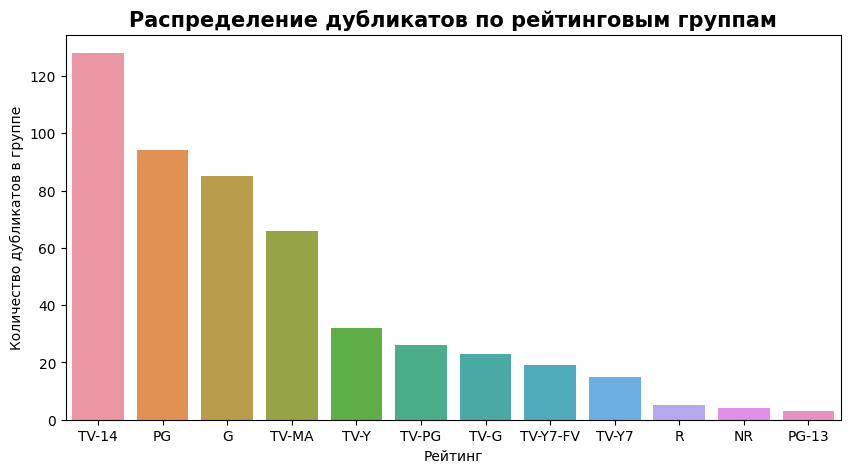

In [ ]:
# Посмотрим распределение дубликатов по рейтинговым группам на диаграмме
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="rating", data=duplicateRows, order=duplicateRows['rating'].value_counts().index[0:15])
plt.title('Распределение дубликатов по рейтинговым группам', fontweight='bold', fontsize=15)
plt.xlabel('Рейтинг')
plt.ylabel('Количество дубликатов в группе')
plt.show()

Вывод: Всего 13 рейтинговых групп. Больше всего дубликатов в  ретинговойгруппе TV-14 (тип программ, содержащей материалы, не подходящие для детей в возрасте до 14 лет). На втором месте - PG (тип программ, предназначенный - Общая аудитория. Подходит для всех возрастов).

In [ ]:
# Посмотрим дубликаты по годам выхода шоу
data_year = data[data.duplicated()].groupby('release year')['title'].count()
data_year

release year
1940      2
1976      3
1978      1
1982      4
1986      3
1987      1
1990      5
1991      4
1992      1
1993      9
1994      2
1995      4
1997     19
1998     17
1999     14
2000     10
2001      5
2002     10
2003      6
2004      1
2005      4
2006      9
2007     10
2008     11
2009     10
2010      7
2011      6
2012     18
2013     24
2014     23
2015     48
2016    146
2017     63
Name: title, dtype: int64

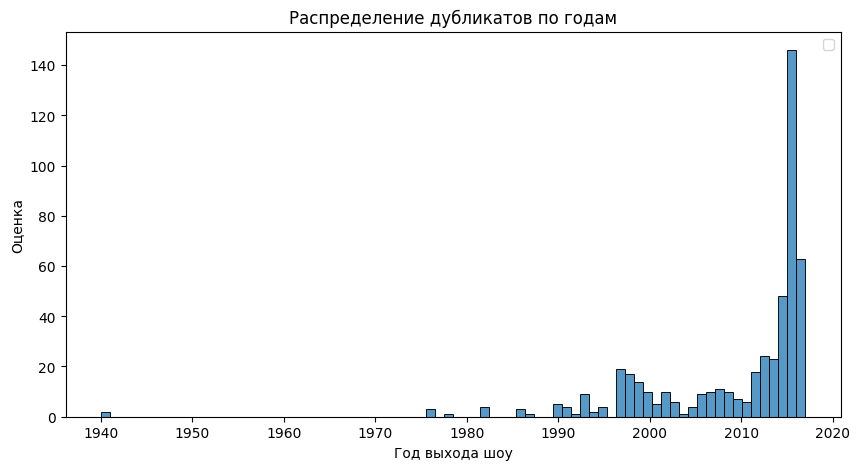

In [ ]:
# Посмотрим распределение дубликатов  по годам на гистрограмме
plt.figure(figsize=(10, 5))
ax = sns.histplot(data[data.duplicated()]['release year'], bins=78)
plt.title('Распределение дубликатов по годам')
plt.xlabel('Год выхода шоу')
plt.ylabel('Оценка')
plt.legend();
plt.show()


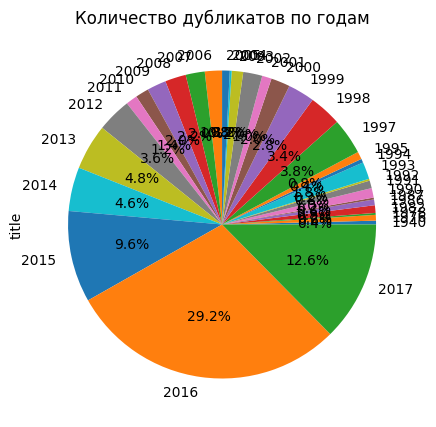

In [ ]:
# Посмотрим количество дубликатов на круговой диаграмме по годам
fig, ax = plt.subplots(figsize=(5,5))
data_year.plot(kind='pie', y='points', autopct='%1.1f%%',
                      # colors = ['red', 'pink', 'steelblue'],
                      title='Количество дубликатов по годам')
plt.show()

Вывод: в последние  три года (2015, 2016, 2017)  количество дубикатов увеличилось на 51,4 %. В 2016 году самое большое количество дубликатов - 29,2%. Конечно их нужно удалять.

Удалим дубликаты и обновим индексы в датафрейме

In [ ]:
data=data.drop_duplicates() # записываем  DataFrame результат удаления дубликатов
data=data.reset_index(drop=True) # обновим индексы в DataFrame.
# если бы мы прописали drop = False, то была бы еще одна колонка - старые индексы
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
495,Russell Madness,PG,some rude humor and sports action,2015,NaN
496,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
497,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
498,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


In [ ]:
data.duplicated().sum() # проверим что дубликатов нет

0

In [ ]:
data.duplicated().info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: None
Non-Null Count  Dtype
--------------  -----
500 non-null    bool 
dtypes: bool(1)
memory usage: 628.0 bytes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              500 non-null    object 
 1   rating             500 non-null    object 
 2   ratingLevel        467 non-null    object 
 3   release year       500 non-null    int64  
 4   user rating score  256 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 19.7+ KB


In [ ]:
# Посчитаем сколько в датасете пропусков по столбцам после удаления дубликатов

data.isnull().sum(axis=0)

title                  0
rating                 0
ratingLevel           33
release year           0
user rating score    244
dtype: int64

### Сколько рейтинговых групп представлено в данных?

In [ ]:
# Посмотрим количество рейтенговых групп
data_rating = data['rating'].value_counts()
data_rating

TV-14       106
TV-MA        82
PG           76
G            53
TV-Y         36
TV-PG        33
TV-G         29
TV-Y7-FV     25
TV-Y7        23
R            14
PG-13        12
NR           10
UR            1
Name: rating, dtype: int64

In [ ]:
# Количество рейтинговых групп
data['rating'].nunique()

13

Построим диаграмму распределение шоу по группам с использование функции countplot() библиотеки seaborn

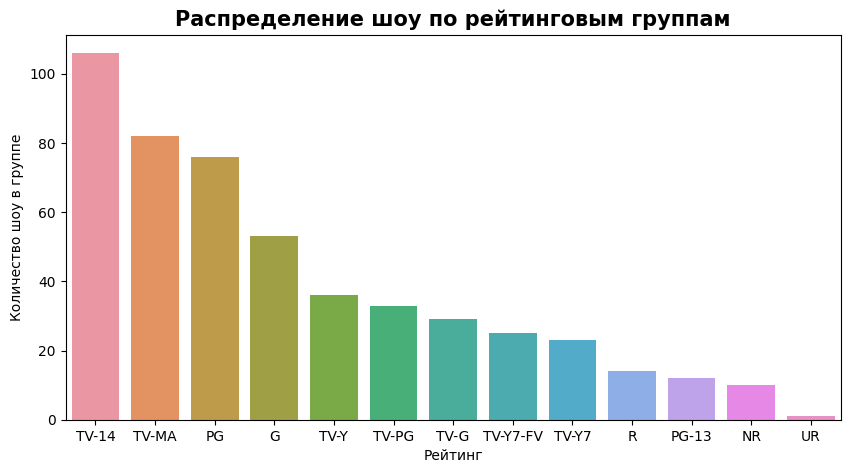

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="rating", data=data, order=data['rating'].value_counts().index[0:15])
plt.title('Распределение шоу по рейтинговым группам', fontweight='bold', fontsize=15)
plt.xlabel('Рейтинг')
plt.ylabel('Количество шоу в группе')
plt.show()

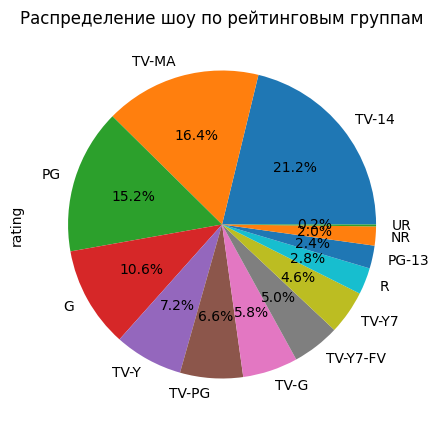

In [ ]:
# Посмотрим распределение шоу по рейтинговым группам на круговой диаграмме
fig, ax = plt.subplots(figsize=(5,5))
data_rating.plot(kind='pie', y='points', autopct='%1.1f%%',
                      # colors = ['red', 'pink', 'steelblue'],
                      title='Распределение шоу по рейтинговым группам')
plt.show()

In [ ]:
data_rating_Level = data['ratingLevel'].value_counts()
data_rating_Level

Parents strongly cautioned. May be unsuitable for children ages 14 and under.       100
Suitable for all ages.                                                               65
For mature audiences.  May not be suitable for children 17 and under.                60
General Audiences. Suitable for all ages.                                            52
Parental guidance suggested. May not be suitable for all children.                   31
                                                                                   ... 
pervasive drug content and language, some violence and sexuality                      1
language and some sexual humor                                                        1
thematic material involving threatening behavior, and for violence and sexuality      1
For some rude and suggestive material, and for language.                              1
some rude humor and sports action                                                     1
Name: ratingLevel, Length: 99, d

Вывод: Всего 13 рейтинговых групп, на первом месте рейтиноговая группа TV-14 (тип программ, содержащей материалы, не подходящие для детей в возрасте до 14 лет) - 21,2% шоу. На втором месте рейтинговая группа - TV-MA (тип программ, подходит для всех возрастов. ) - 16,4%. На последнем  UR (тип программы, черный юмор и активный спорт) - 0,2%

### Какие оценки пользователи ставят чаще?

- Постройте гистограмму оценок.
- Почему именно такие оценки ставят чаще всего?

In [ ]:
# посмотрим на столбец user rating score (оценка пользователей)
data.loc[:,'user rating score']

0      82.0
1       NaN
2      98.0
3      98.0
4      94.0
       ... 
495     NaN
496     NaN
497     NaN
498     NaN
499     NaN
Name: user rating score, Length: 500, dtype: float64

In [ ]:
# Считаем сколько раз каждое значение категории встречается методом .value_counts()
data_freq=data['user rating score'].value_counts()
data_freq

97.0    12
96.0    12
98.0    12
95.0    11
91.0    11
93.0     9
88.0     9
81.0     9
94.0     8
92.0     8
79.0     8
85.0     8
61.0     7
89.0     7
74.0     7
84.0     7
80.0     7
77.0     7
90.0     7
86.0     6
82.0     6
83.0     6
57.0     6
70.0     5
64.0     5
68.0     5
71.0     5
56.0     5
69.0     4
67.0     4
58.0     4
62.0     4
73.0     4
63.0     4
66.0     3
78.0     3
72.0     3
55.0     2
75.0     2
65.0     2
99.0     1
59.0     1
Name: user rating score, dtype: int64

In [ ]:
# Посмотрим количество уникальных значений в столбце user rating score (оценок пользователей)
data['user rating score'].nunique()

42

In [ ]:
# Посмотрим количество уникальных значений по столбцам
data.nunique()

title                496
rating                13
ratingLevel           99
release year          35
user rating score     42
dtype: int64

In [ ]:
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
495,Russell Madness,PG,some rude humor and sports action,2015,NaN
496,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
497,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
498,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


Построим гистограмму распределений значений (оценок)

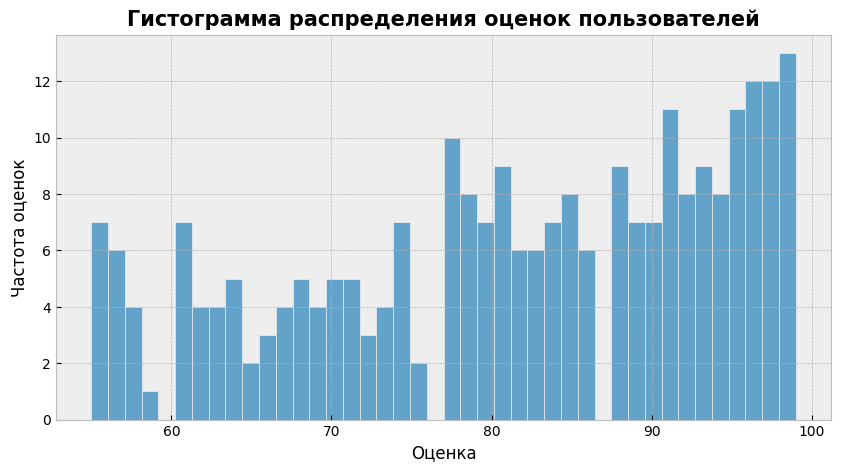

In [ ]:
# рисуем с помощью библиотеки seaborn
plt.figure(figsize=(10, 5))
plt.style.use('bmh')
sns.histplot(data=data,# какой датафрейм используем
             x='user rating score', # какую переменную отрисовываем
            bins = 42);  # на сколько ячеек разбиваем
plt.title('Гистограмма распределения оценок пользователей', fontweight='bold', fontsize=15)
plt.xlabel('Оценка')
plt.ylabel('Частота оценок')
plt.show()

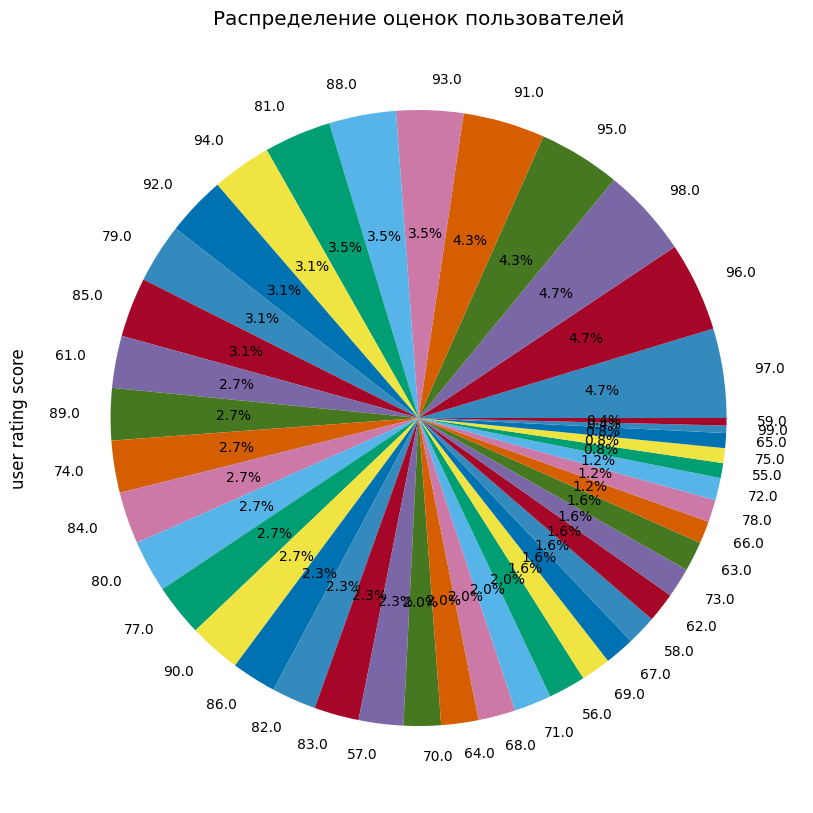

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
data_freq.plot(kind='pie', y='points', autopct='%1.1f%%',
                      # colors = ['red', 'pink', 'steelblue'],
                      title='Распределение оценок пользователей')
plt.show()

Вывод: большое количество шоу с высокими оценками пользователей. Есть пропуски в оценках - 60, 76, 87.

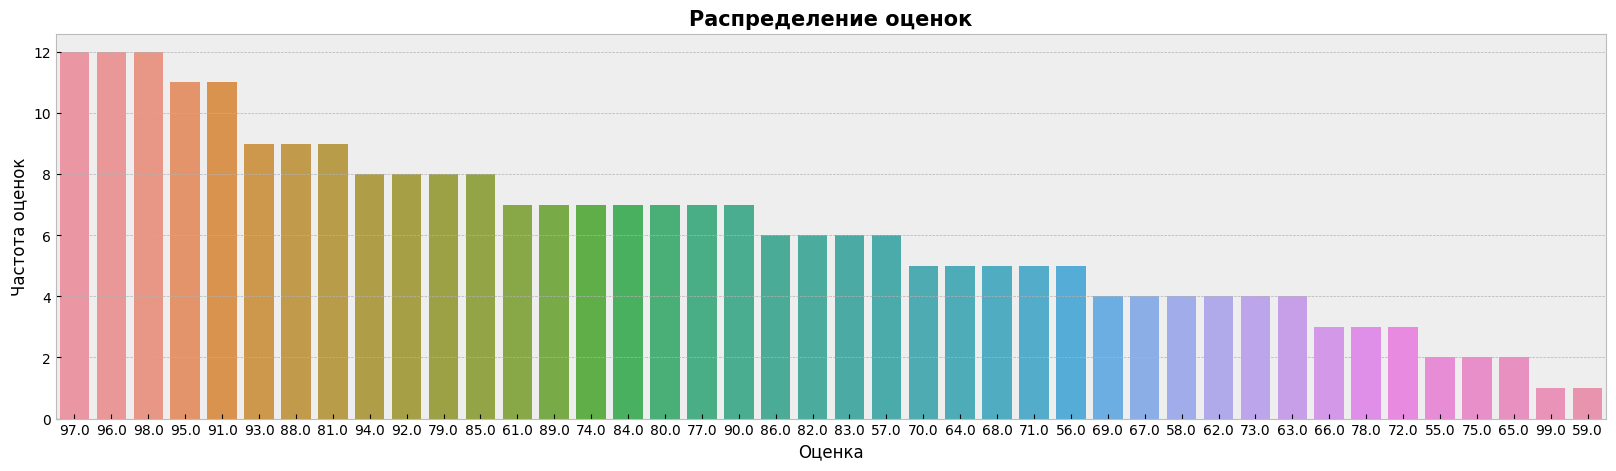

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20, 5))
ax = sns.countplot(x="user rating score", data=data, order=data['user rating score'].value_counts().index[0:42])
plt.title('Распределение оценок', fontweight='bold', fontsize=15)
plt.xlabel('Оценка')
plt.ylabel('Частота оценок')
plt.show()

In [ ]:
# Посмотрим на корреляцию числовых столбцов
# .corr() для получения матрицы корреляции из DataFrame (нечисловые признаки будут проигнорированы)
# .style.background_gradient(cmap, vmin, vmax) чтобы подсветить красиво таблицу
data.corr().style.background_gradient(cmap = 'YlOrRd', # наш цветовой стиль
                                    vmin = -1, # указываем нижний диапазон
                                    vmax=1) # указываем верхний  диапазон

<ipython-input-53-9aec1ae7d556>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().style.background_gradient(cmap = 'YlOrRd', # наш цветовой стиль


,release year,user rating score
release year,1.000000,0.200235
user rating score,0.200235,1.000000


Вывод: Из матрицы корреляции видно, что признаки release year(год выпуска шоу) и
user rating score (оценка пользователей) имеют 20%  корреляцию. Значит данный признак может нести дополнительную информацию.

In [ ]:
# Сгруппируем данные по году выпуска шоу от количества оценок
data_cor = data.groupby('release year')['user rating score'].count()
data_cor

release year
1940     1
1976     0
1978     1
1982     1
1986     1
1987     1
1989     1
1990     1
1991     0
1992     1
1993     3
1994     4
1995     2
1996     0
1997     5
1998     5
1999     4
2000     4
2001     2
2002     2
2003     5
2004     3
2005     7
2006     7
2007     5
2008     6
2009     3
2010     6
2011     2
2012    16
2013    11
2014    12
2015    32
2016    86
2017    16
Name: user rating score, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


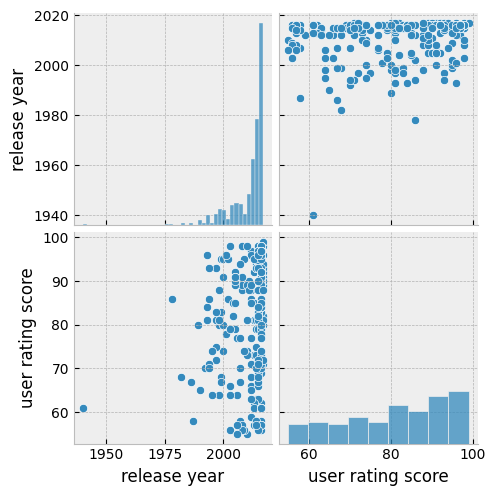

In [ ]:
sns.pairplot(data = data,  # какой датафрейм используем
            # hue ='user rating score', # какую переменную используем для подкрашиваиния данных.
                                # Рекомендуется использовать Категориальные данные (не очень много уникальных значений)
             palette = 'bwr',); # какую цветовую карту используем. Здесь у нас всего 2 варианта, то мы используем bwr - один из Diverging
                                # если категорий больше, то лучше использовать что-то из Qualitative

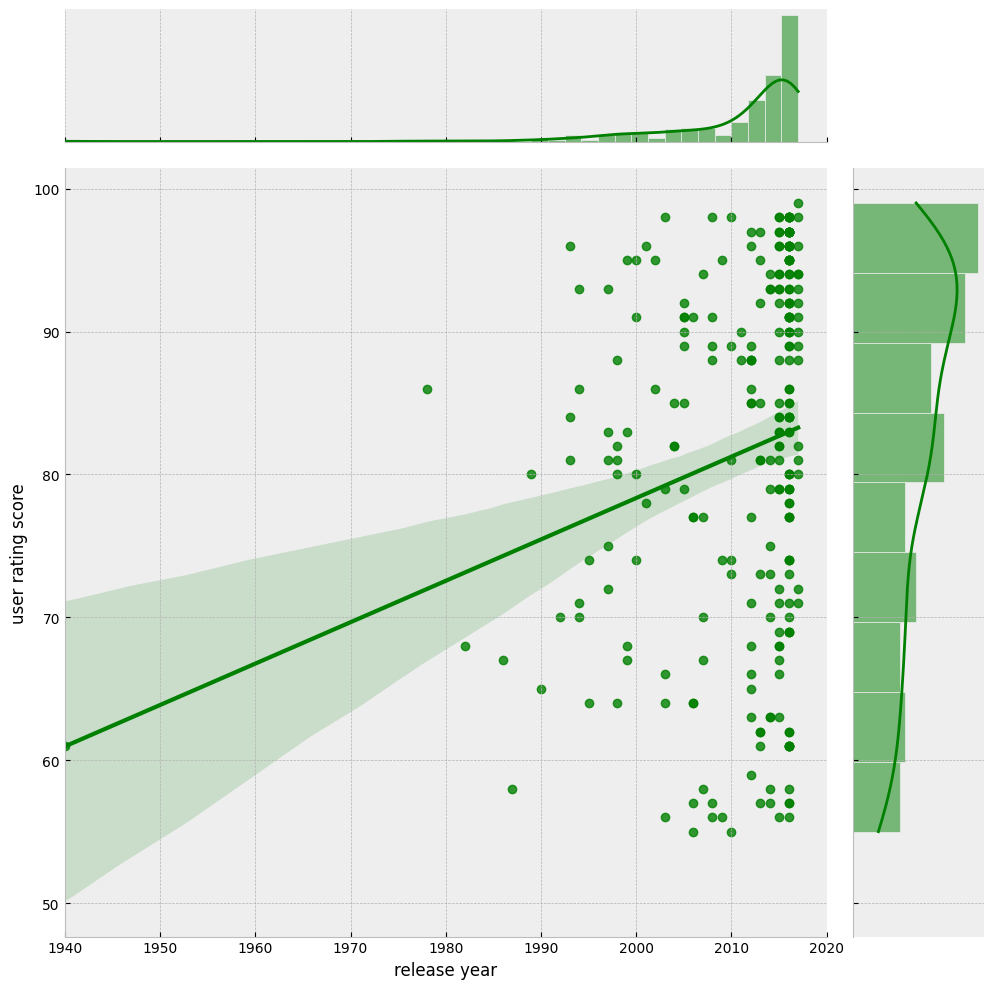

In [ ]:
sns.jointplot(x="release year",y="user rating score", data=data,
              kind="reg", truncate=True,
              xlim=(1940, 2020),
              color="g", height=10)

Вывод: c каждым годом количество шоу становится больше.
Со временем пользователи стали ставить оценки в шоу более высокие баллы. После 2012  количество шоу становится значительно больше. Чем больше шоу тем чаще ставят оценки.   


### Выведите основную информацию об оценках пользователей
- Чему равны среднее, стандартное отклонение, минимум, максимум, медиана?
- Отличаются ли медиана и среднее?
- Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
# вычислем сводку статистик по столбцу user rating score (оценки пользователей)
data['user rating score'].describe()

count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user rating score, dtype: float64

In [ ]:
# среднее по оценкам пользователей
data['user rating score'].mean()

81.3984375

In [ ]:
# стандартное отклонение по оценкам пользователей
data['user rating score'].std()

12.730904096632221

In [ ]:
# минимальная оценка пользователей
data['user rating score'].min()

55.0

In [ ]:
# максимальная оценка пользователей
data['user rating score'].max()

99.0

In [ ]:
# вычисляем медиану по оценкам пользователей
data['user rating score'].median()


83.5

In [ ]:
# вычисляем моду по оценкам пользователей
data['user rating score'].mode()

0    96.0
1    97.0
2    98.0
Name: user rating score, dtype: float64

In [ ]:
# вычисляем дисперсию по оценкам пользователей
data['user rating score'].var()

162.07591911764706

###Чему равны среднее, стандартное отклонение, минимум, максимум, медиана?
*   среднее (mean):81.4
*   стандартное отклонение(std):12.7
*   минимум (min): 55
*   максимум (max): 99
*   медиана (median): 83.5

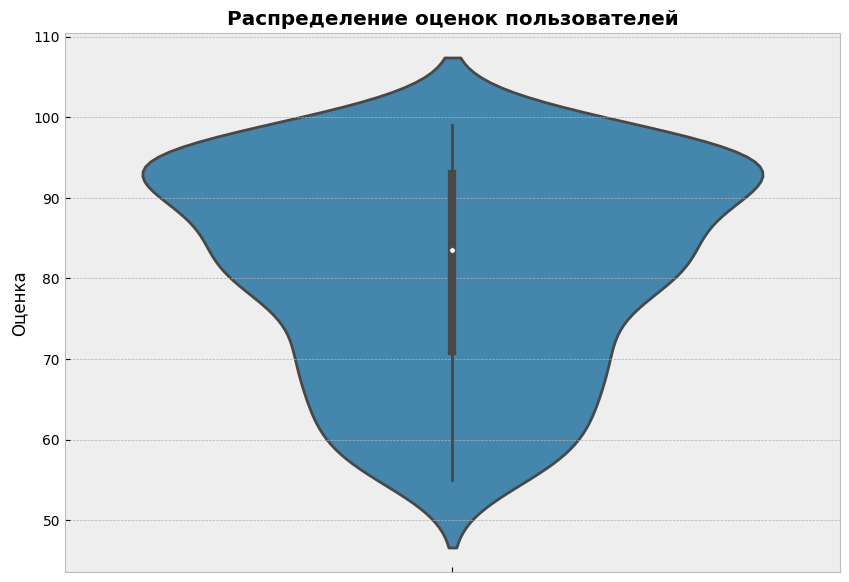

In [ ]:
# Посмотрим распределение оценок пользователя с помощью скрипичной диаграммой
#Скрипичные диаграммы могут эффективно отображать распределение данных,
# сравнивать различные наборы данных и выявлять аномалии (выбросы) и тенденции.
# Такие диаграммы, показывают сводную статистику.
# Дополнительно они включают в себя графики плотности распределения, которые и определяют форму/распределение данных при визуализации.
f, ax = plt.subplots(figsize=(10, 7))

sns.violinplot(y="user rating score", data=data)

plt.title('Распределение оценок пользователей', fontweight='bold')
plt.ylabel('Оценка')
plt.show()

###Используем Pandas Profiling
Pandas Profiling - это библиотека для генерации интерактивных отчетов на основе пользовательских данных: можем увидеть распределение данных, типы, возможные проблемы.

**Использование**

Пользоваться библиотекой очень просто — надо всего лишь указать объект DataFrame для которого нужно выполнить исследование. Это осуществляется методом:

`df.profile_report()`, где df - исследуемый DataFrame.

Методу можно передать следующие параметры:  

* `title` - название отчёта,
* `pool_size (int)` - количество потоков для выполнения (по умолчанию = 0 - используются все потоки),
* `progress_bar (bool)` - если True, то показывается прогресс бар,
* `explorative (bool)` - если True, то выполняется более глубокий анализ (для текстов и файлов),
* `minimal (bool)` - если True, то ресурсоёмкие вычисления не выполняются. Рекомендуется при работе с большими датасетами.

In [ ]:
!pip3 install pandas-profiling==3.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.1/303.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=aead4ea7fd035f8111d78ad8e30fed64f34634bf62511781fa2baee47394b410
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.3
    Uninstalling MarkupSafe-2.1.3:
      Successfully uninstalled MarkupSafe-2.1.3
  Attempting uninsta

In [ ]:
pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 66.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=a9eee1023b1033d7234c5b3d1c48bc40b91af2b99138c411d20c16764277098c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.0
    Uninstalling pydantic-2.2.0:
      Successfully uninstalled pydantic-2.2.0


In [ ]:
from pandas_profiling import ProfileReport

<ipython-input-69-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
profile_final = ProfileReport(data, title="Шоу", explorative=True, minimal=True)

In [ ]:
profile_final.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

###Отличаются ли медиана и среднее?

<ipython-input-66-5296f1d49a8e>:2: FutureWarning: ['title', 'rating', 'ratingLevel'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_score_mean_medin = data.groupby('user rating score').agg(['mean', 'median'])


<Axes: ylabel='Density'>

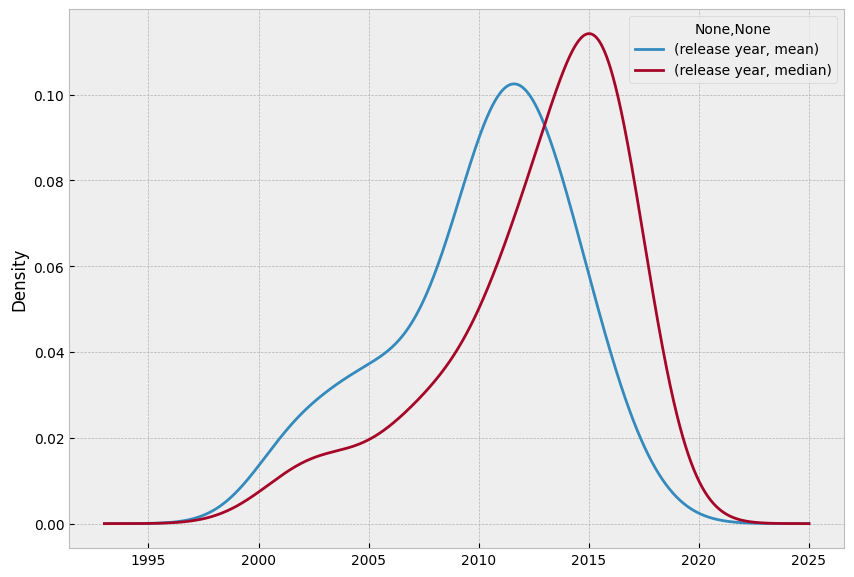

In [ ]:
#Отличаются ли медиана и среднее? Построим графики распределения плотностей в одних координатах
df_score_mean_medin = data.groupby('user rating score').agg(['mean', 'median'])
df_score_mean_medin.plot(kind='kde', figsize=(10, 7))

Медиана: 83.5 и среднее: 81.4 отличаются, есть отрицательный сдвиг.

Вывод: Если среднее значение переменной больше медианы, ее распределение имеет положительную асимметрию. Если медиана больше среднего значения, распределение переменной имеет отрицательную асимметрию. В данной случае имеем отрицательную асимметрию Skewness:	-0.4791072493

###Могут ли данные характеристики (среднее и медиана) значительно отличаться? Почему?
Да, могут. Зависит от датасета и как он был обработан.

###Среднее арифметическое и медиана — два способа оценить средние значения.
**Среднее арифметическое** — широко используемая мера центральной тенденции в анализе данных. Оно рассчитывается путем сложения всех значений в наборе данных и деления суммы на общее количество значений.

**Сильные стороны использования среднего арифметического:**
*   Формулу среднего арифметического легко запомнить, она проста для понимания и вычисления.
*   Среднее арифметическое учитывает все значения в наборе данных.
*   Среднее арифметическое — интуитивно понятная метрика, которая широко используется во многих областях. Она позволяет легко сравнивать различные наборы данных.

**Слабые стороны использования среднего арифметического:**
* Среднее арифметическое очень чувствительно к так называемым «выбросам» — отдельным значениям, которые значительно отличаются от других в этом датасете, в большую или меньшую сторону.
«Выбросы» могут искажать среднее значение, давая тем самым неверное представление о центральной тенденции в данных.
* Среднее арифметическое может оказаться слишком дорогим для вычисления, если речь идет о больших датасетах. Добавление всех значений в датасет требует времени, а для наборов данных с миллионами значений подсчет вручную будет нецелесообразным.

В продакт-менеджменте опора на такие результаты может привести к неверным решениям или упущенным возможностям.

Среднее арифметическое пригодится, когда требуется простая, интуитивно понятная метрика, которая представляет собой типичное значение для набора чисел без заметных «выбросов».


**Медиана** — это мера центральной тенденции, которая представляет собой серединное значение набора данных, расположенного в порядке от меньшего к большему. Медиана — полезный инструмент для анализа данных, когда в нем присутствуют «выбросы» или экстремальные значения, которые могут исказить среднее арифметическое.

Для расчета медианы нужно расположить значения в наборе данных от наименьшего к наибольшему. Если в наборе данных нечетное количество значений, медианой будет серединное значение.
Если набор данных состоит из четного количества значений, то медиана — это среднее двух серединных значений.

**Сильные стороны использования медианы:**
* Медиана менее чувствительна к выбросам, чем среднее арифметическое, и более устойчива к влиянию нескольких экстремальных значений.
* Медиану легче посчитать для больших датасетов, особенно если база данных проиндексирована и отсортирована правильно.

**Слабые стороны использования медианы:**
* Медиана может оказаться контринтуитивной для людей, которые слабо знакомы со статистикой.
* Медиана игнорирует некоторые значения в наборе данных, фокусируясь только на серединном значении. Это может создать сложности в ситуациях, когда важно учитывать все значения в наборе данных.
* Медиана не дает никакой информации о разбросе данных или о том, насколько изменчивы эти значения.


**Как выбрать между средним арифметическим и медианой**

* Распределение данных: если в датасете наблюдается нормальное распределение, то среднее арифметическое — хороший выбор для измерения центральной тенденции. Но если в данных есть «выбросы», то лучше использовать медиану.
* Цель или контекст анализа: выбор между средним арифметическим и медианой может зависеть от контекста конкретного анализа.
* Размер выборки: если в распоряжении небольшая выборка, то использовать стоит медиану, поскольку она менее чувствительна к «выбросам». В случае с большой выборкой среднее арифметическое будет более точно отражать реальность.

**Совместное использование среднего арифметического и медианы**
В ряде случаев использование среднего арифметического и медианы может дать более полную картину о центральных тенденциях в датасете. Анализируя обе метрики, мы можем лучше понимать распределение значений и находить «выбросы» или экстремальные значения, которые могут оказывать влияние на данные.

<Axes: >

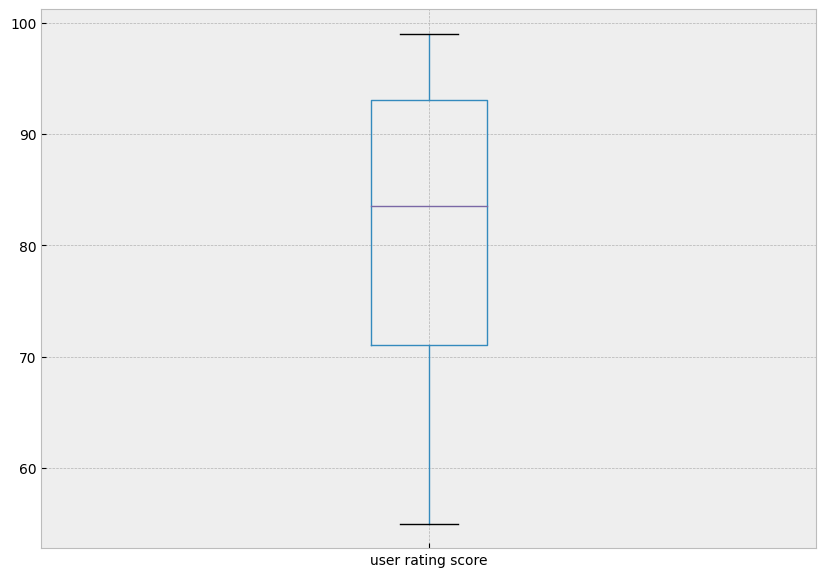

In [ ]:
# Посмотрим на выбросы с помощью ящика с усами (boxplot)
data[['user rating score']].boxplot(figsize = (10, 7))

По ящику с усами видим, что выбросов нет.

### В какие годы были запущены шоу, представленные в датасете?

In [ ]:
# Посмотрим количество запущенных шоу от года
data_cor1 = data['release year'].value_counts()
data_cor1

2016    146
2015     61
2017     37
2014     35
2013     33
2012     27
2011     15
2010     13
2008     11
2003     11
2005     10
2009     10
2006     10
1997      9
1998      9
2007      8
2000      7
2004      7
2001      6
1999      5
1993      5
2002      5
1994      4
1989      2
1982      2
1990      2
1995      2
1992      1
1991      1
1986      1
1978      1
1940      1
1996      1
1976      1
1987      1
Name: release year, dtype: int64

### Постройте график, показывающий распределение количества запущенных шоу в зависимости от года.

- Наблюдается ли рост?
- Есть ли выбросы?
- Что из себя представляют выбросы?
- Чем могут быть они вызваны?

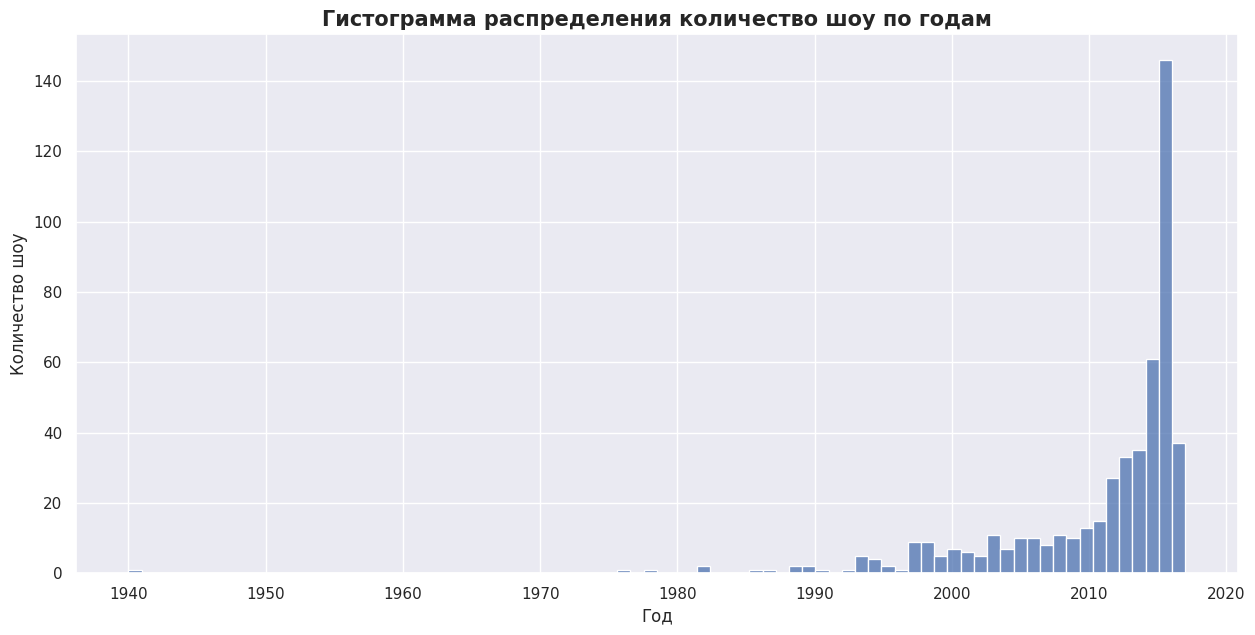

In [ ]:
plt.figure(figsize=(15, 7))
sns.set_theme(style="darkgrid")
sns.histplot(data['release year'], bins=80)
plt.title('Гистограмма распределения количество шоу по годам', fontweight='bold', fontsize=15)
plt.xlabel('Год')
plt.ylabel('Количество шоу')
plt.show()


Наблюдаем увеличение количество запущенных шоу по годам. На гистрограмме видим одно шоу 1940.

In [ ]:
# Выведим информацию по шоу 1940 года
data[data['release year']==1940]

,title,rating,ratingLevel,release year,user rating score
412,Fantasia,G,General Audiences. Suitable for all ages.,1940,61.0


<Axes: >

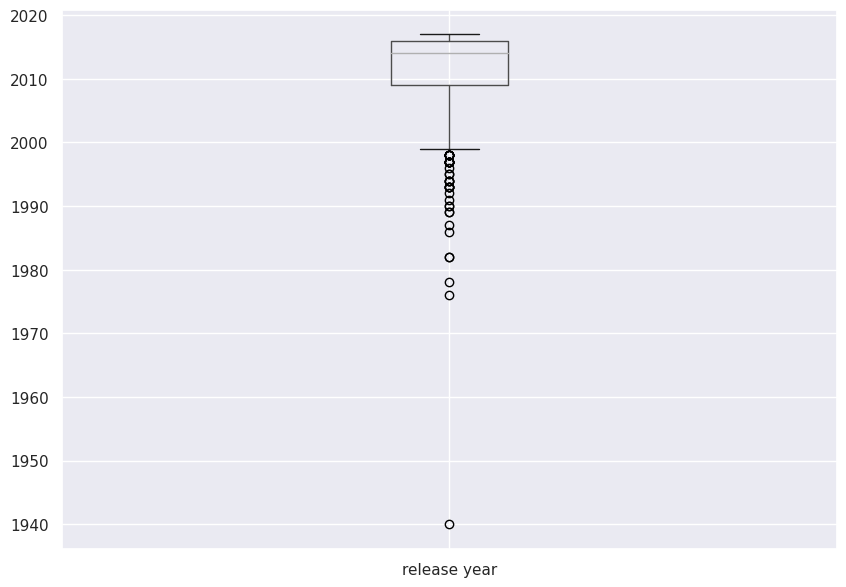

In [ ]:
# Посмотрим на выбросы с помощью ящика с усами (boxplot)
data[['release year']].boxplot(figsize = (10, 7))

Вывод:

Таким образом, по ящику можно понять медиану и интерквартильный размах, что позволяет оценить область, в которой находится большая часть всех значений величины. Но что же показывают усы? Они просто показывают весь диапазон возможных значений случайной величины, левый ус показывает, где находится минимальное значение, а правый — максимальное. Однако мы видим, что есть отдельные точки, которые не захватываются усами. Эти точки называются выбросами, так как они сильно выбиваются из основной массы значений. Поэтому усы показывают на самом деле не минимум и максимум, а наблюдаемые минимум и максимум, то есть без учета выбросов.
Выбросы начинаются с 1940 и до 2000 годов.
Выбросами называют экстремальные значения, которые отклоняются от общий картины в выборке. Выбросы не должны участвовать в обработке результатов по двум причинам: они не отражают нормальное течение процесса, а сама величина «выбросов» как правило, значительно превышает колебания параметра, обусловленные действием множества «истинно случайных» факторов, приводящих к его реальному распределению.

###Перечислим наиболее распространенные ошибки и причины выбросов:
*   Ошибки ввода данных (человеческие ошибки).
*   Экспериментальные ошибки (извлечение данных или планирование/выполнение эксперимента).
*   Ошибки обработки данных (манипулирование данными или непреднамеренные изменения в наборе данных).
*   Ошибки выборки (извлечение или смешивание данных из неправильных или различных источников).
*   Естественные причины (не ошибка, а реализация маловероятных случайных событий).







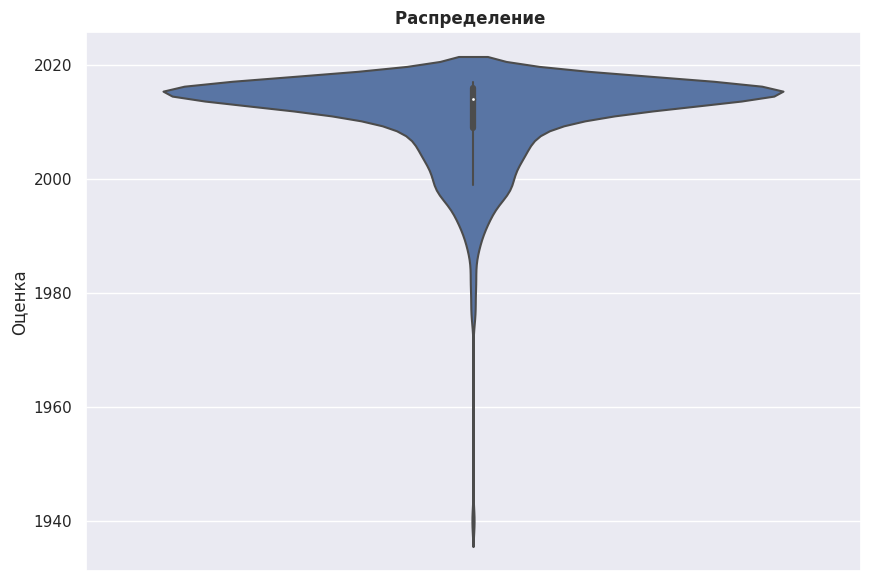

In [ ]:
# Посмотрим на выбросы с помощью скрипичной диаграммы
f, ax = plt.subplots(figsize=(10, 7))

sns.violinplot(y="release year", data=data)

plt.title('Распределение ', fontweight='bold')
plt.ylabel('Оценка')
plt.show()

Вывод: Шоу 1940 года Fantasia «Фантазия» (англ. Fantasia) — классический полнометражный музыкальный мультипликационный фильм, созданный компанией Уолта Диснея и впервые показанный 13 ноября 1940 года[6].  (https://ru.wikipedia.org/wiki/%D0%A4%D0%B0%D0%BD%D1%82%D0%B0%D0%B7%D0%B8%D1%8F_(%D0%BC%D1%83%D0%BB%D1%8C%D1%82%D1%84%D0%B8%D0%BB%D1%8C%D0%BC). Это шоу действительно существовало, тогда на этот выброс послужила естественная причина(не ошибка, а реализация маловероятного случайного события)


In [ ]:
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
495,Russell Madness,PG,some rude humor and sports action,2015,NaN
496,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
497,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
498,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


In [ ]:
data_m=data[['release year', 'user rating score']]
data_m.sort_values(by='release year').head(20)

,release year,user rating score
412,1940,61.0
270,1976,NaN
170,1978,86.0
423,1982,NaN
379,1982,68.0
413,1986,67.0
466,1987,58.0
487,1989,80.0
283,1989,NaN
405,1990,65.0


In [ ]:
data_m2=data.groupby('release year').agg({'user rating score':'mean'})
data_m2

,user rating score
release year,
1940,61.000000
1976,NaN
1978,86.000000
1982,68.000000
1986,67.000000
1987,58.000000
1989,80.000000
1990,65.000000
1991,NaN


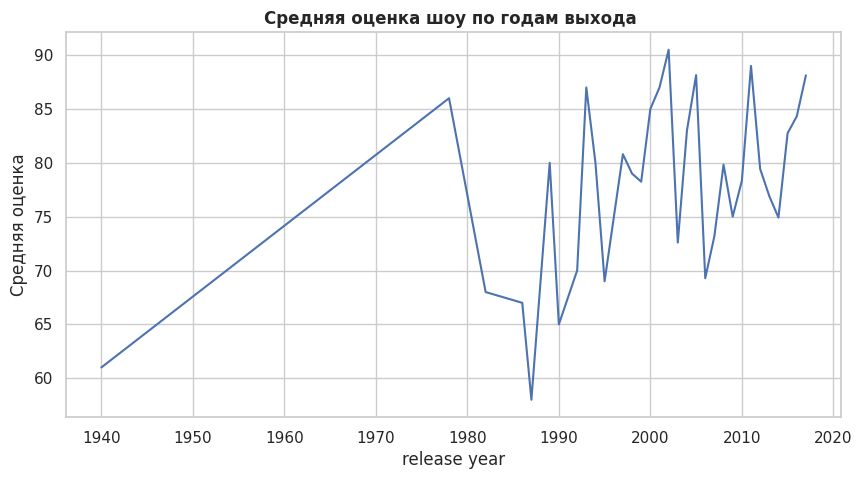

In [ ]:
# Посмотрим средние оценки по годам
fig, ax = plt.subplots(figsize=(10, 5))
sns.set_style('whitegrid')

sns.lineplot(x="release year", y='user rating score', data=data_m2, )

plt.title('Средняя оценка шоу по годам выхода ', fontweight='bold')
plt.ylabel('Средняя оценка')
plt.show()

In [ ]:
data_m.mean()

release year         2010.976000
user rating score      81.398438
dtype: float64

### Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017.
- Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)
- Как еще можно оценить "Успешность"?



In [ ]:
data_concat=pd.concat([
    data[data['release year'] == 2016]['user rating score'].describe(),
    data[data['release year'] == 2017]['user rating score'].describe()
], axis=1, keys=['2016', '2017'])
data_concat

,2016,2017
count,86.000000,16.000000
mean,84.313953,88.125000
std,12.599030,8.585841
min,56.000000,71.000000
25%,77.000000,81.750000
50%,89.000000,90.500000
75%,95.000000,94.000000
max,98.000000,99.000000


In [ ]:
 data[data['release year'] == 2016]['user rating score'].mean()

84.31395348837209

In [ ]:
data[data['release year'] == 2017]['user rating score'].mean()

88.125

In [ ]:
 data[data['release year'] == 2016]['user rating score'].median()

89.0

In [ ]:
data[data['release year'] == 2017]['user rating score'].median()

90.5

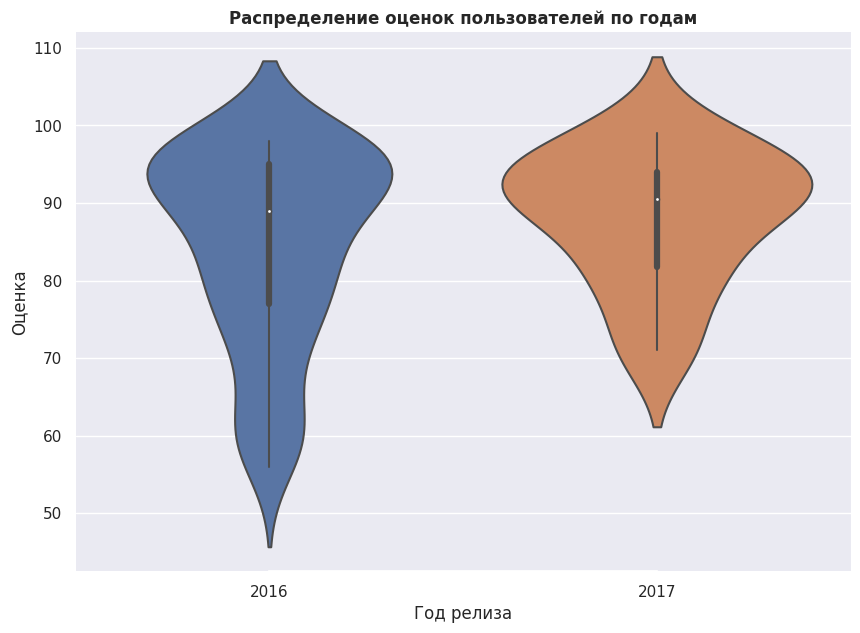

In [ ]:
f, ax = plt.subplots(figsize=(10, 7))


sns.violinplot(x="release year", y="user rating score", data=data[data['release year'].isin([2016, 2017])])

ax.xaxis.grid(False)
sns.despine(trim=True, left=True)
plt.title('Распределение оценок пользователей по годам', fontweight='bold')
plt.xlabel('Год релиза')
plt.ylabel('Оценка')
plt.show()

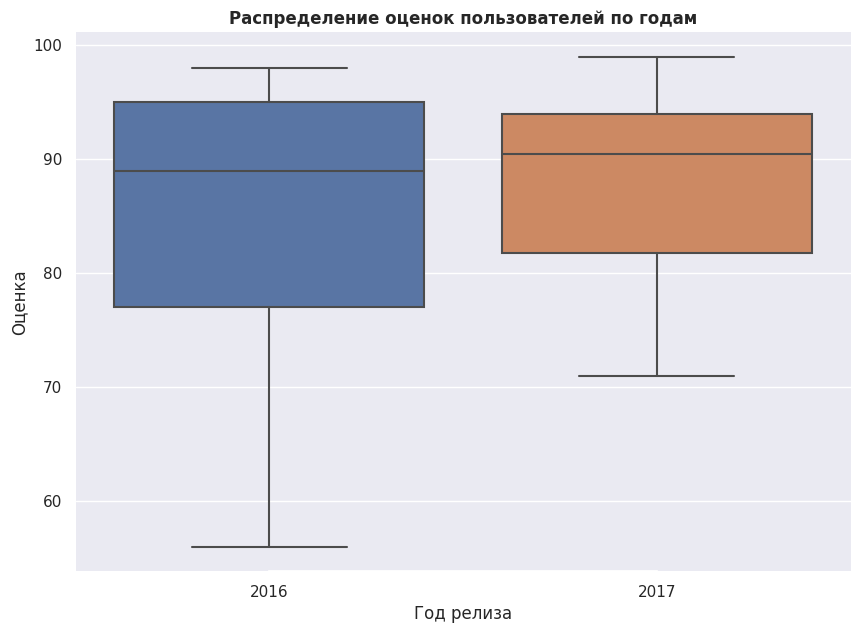

In [ ]:
f, ax = plt.subplots(figsize=(10, 7))


sns.boxplot(x="release year", y="user rating score", data=data[data['release year'].isin([2016, 2017])])

ax.xaxis.grid(False)
sns.despine(trim=True, left=True)
plt.title('Распределение оценок пользователей за 2016 и 2017 годы', fontweight='bold')
plt.xlabel('Год релиза')
plt.ylabel('Оценка')
plt.show()

* Средняя оценка в 2016 году: 84.3
* Медиана в 2016 году: 89.0
* Средняя оценка в 2017 году: 88.1
* Медиана в 2017 году: 90.5

Количество шоу:
* 2016:146
* 2017:37

Видим, что количество запущенных шоу в 2016 году в 3.9 раза больше чем в 2017 году.

Нельзя сказать что 2017 год успешнее 2016 года. Средняя оценка в 2017 выше, но в 2016 оценок больше.

Если посмотреть на медианы, то они почти равны, при таком количестве наблюдений мы не сможем зафиксировать статистически значимую разницу.

### Как нагляднее будет показать распределение пользователям по рейтинговым группам?

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

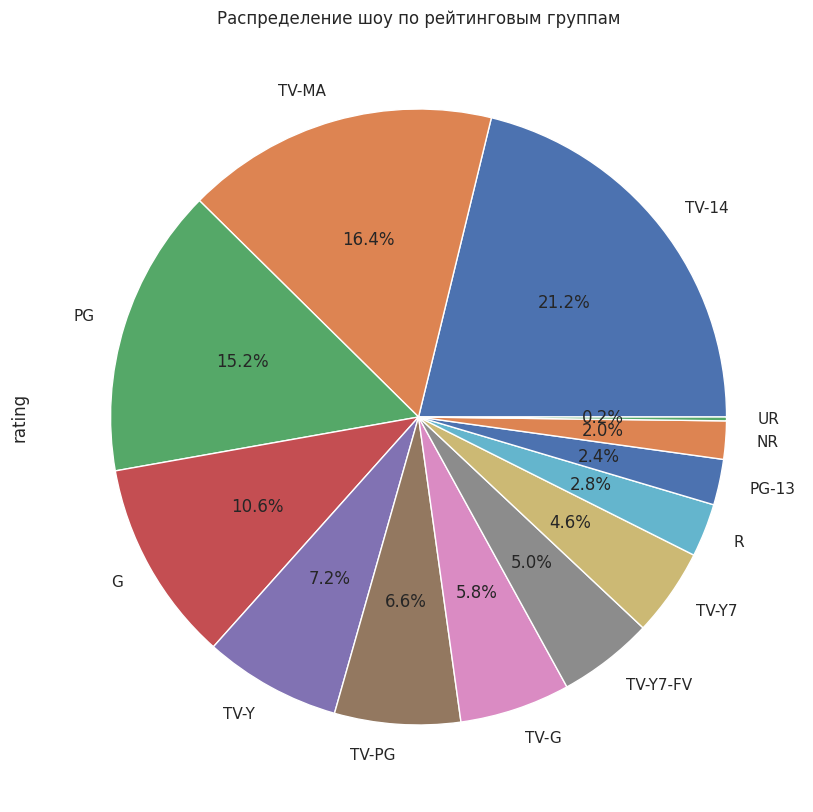

In [ ]:
# Посмотрим распределение шоу по рейтинговым группам на круговой диаграмме
fig, ax = plt.subplots(figsize=(10,10))
data_rating.plot(kind='pie', y='points', autopct='%1.1f%%',
                      # colors = ['red', 'pink', 'steelblue'],
                      title='Распределение шоу по рейтинговым группам')
plt.show()

### Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :)
Аналитики и Data Scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

Возьмем шоу Fantsia 1940 года, рейтинговой группы G.

In [ ]:
data[data['release year']==1940]

,title,rating,ratingLevel,release year,user rating score
412,Fantasia,G,General Audiences. Suitable for all ages.,1940,61.0


In [ ]:
data_G=data[data['rating']=='G']
data_G

,title,rating,ratingLevel,release year,user rating score
177,Hannah Montana: The Movie,G,General Audiences. Suitable for all ages.,2009,56.0
267,Chicken Little,G,General Audiences. Suitable for all ages.,2005,92.0
270,The Smurfs and the Magic Flute,G,General Audiences. Suitable for all ages.,1976,NaN
271,We're Back! A Dinosaur's Story,G,General Audiences. Suitable for all ages.,1993,NaN
313,An Extremely Goofy Movie,G,General Audiences. Suitable for all ages.,1999,67.0
323,Super Buddies,G,General Audiences. Suitable for all ages.,2013,NaN
343,Growing Up Wild,G,NaN,2016,80.0
346,Tarzan,G,General Audiences. Suitable for all ages.,1999,95.0
347,The Emperor's New Groove,G,General Audiences. Suitable for all ages.,2000,95.0
350,The Three Musketeers,G,General Audiences. Suitable for all ages.,2004,NaN


In [ ]:
#Посмотрим всю информацию по рейтинговой группе G
data_G.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 177 to 497
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              53 non-null     object 
 1   rating             53 non-null     object 
 2   ratingLevel        52 non-null     object 
 3   release year       53 non-null     int64  
 4   user rating score  19 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.5+ KB


Видим, что рейтинговой группе G содержит 53 шоу.

In [ ]:
#Посмотрим всю информацию по рейтинговой группе G с помощью статистики describe
data_G.describe()

,release year,user rating score
count,53.000000,19.000000
mean,2000.905660,74.421053
std,12.085058,14.893383
min,1940.000000,55.000000
25%,1998.000000,62.500000
50%,2002.000000,70.000000
75%,2006.000000,88.500000
max,2016.000000,96.000000


In [ ]:
data[data['rating']=='G'].groupby('rating')['title','release year'].value_counts()

<ipython-input-84-9e1a5999f9f3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['rating']=='G'].groupby('rating')['title','release year'].value_counts()


rating  title                                                     release year
G       Air Bud: Spikes Back                                      2003            1
        Kronk's New Groove                                        2005            1
        Mulan 2                                                   2004            1
        Pooh's Grand Adventure: The Search for Christopher Robin  1997            1
        Pooh's Heffalump Movie                                    2005            1
        Pup Star                                                  2016            1
        Recess: Taking the Fifth Grade                            2003            1
        Secret of the Wings                                       2012            1
        Super Buddies                                             2013            1
        Tarzan                                                    1999            1
        Tarzan & Jane                                             2002           

In [ ]:
# Посчитаем сколько в в группе G пропусков по столбцам

data_G.isnull().sum(axis=0)

title                 0
rating                0
ratingLevel           1
release year          0
user rating score    34
dtype: int64

Видим, что пропущены оценки 34 из 53 возможных (64%) и 1 описание группы.

In [ ]:
data_G.duplicated().sum() # метод .duplicated() возвращает данные в бинарном виде: является ли отдельная строка дубликатом (True если является)
#Просуммировав мы узнаем сколько всего дубликатов

0

Дубликатов в рейтинговой группе G нет

In [ ]:
# Посмотрим количество запущенных шоу от года в рйтинговой группе G
data_G_count = data[data['rating']=='G'].value_counts()
data_G_count

title                                   rating  ratingLevel                                release year  user rating score
An American Tail                        G       General Audiences. Suitable for all ages.  1986          67.0                 1
An Extremely Goofy Movie                G       General Audiences. Suitable for all ages.  1999          67.0                 1
The Emperor's New Groove                G       General Audiences. Suitable for all ages.  2000          95.0                 1
Tarzan                                  G       General Audiences. Suitable for all ages.  1999          95.0                 1
Secret of the Wings                     G       General Audiences. Suitable for all ages.  2012          65.0                 1
Mulan 2                                 G       General Audiences. Suitable for all ages.  2004          85.0                 1
Homeward Bound: The Incredible Journey  G       General Audiences. Suitable for all ages.  1993          96.0

In [ ]:
#Посмотрим уникальные значения по столбцам
data[data['rating']=='G'].nunique()

title                53
rating                1
ratingLevel           1
release year         26
user rating score    15
dtype: int64

In [ ]:
data_G_count.info()

<class 'pandas.core.series.Series'>
MultiIndex: 18 entries, ('An American Tail', 'G', 'General Audiences. Suitable for all ages.', 1986, 67.0) to ('The Pirate Fairy', 'G', 'General Audiences. Suitable for all ages.', 2014, 57.0)
Series name: None
Non-Null Count  Dtype
--------------  -----
18 non-null     int64
dtypes: int64(1)
memory usage: 3.3+ KB


In [ ]:
# plt.figure(figsize=(15, 7))
# sns.set_theme(style="darkgrid")
# sns.histplot(data_G_count['release year'], bins=80)
# plt.title('Гистограмма распределения количество шоу по годам', fontweight='bold', fontsize=15)
# plt.xlabel('Год')
# plt.ylabel('Количество шоу')
# plt.show()

In [ ]:
data_G_year=data_G.groupby('release year')['title'].count()
data_G_year

release year
1940    1
1976    1
1982    1
1986    1
1990    1
1991    1
1992    1
1993    2
1995    1
1997    3
1998    3
1999    3
2000    5
2001    1
2002    2
2003    4
2004    4
2005    3
2006    3
2009    1
2011    1
2012    2
2013    1
2014    3
2015    1
2016    3
Name: title, dtype: int64

In [ ]:
data_G_year_1 = data_G_year.to_frame(name='num')
data_G_year_1

,num
release year,
1940,1
1976,1
1982,1
1986,1
1990,1
1991,1
1992,1
1993,2
1995,1


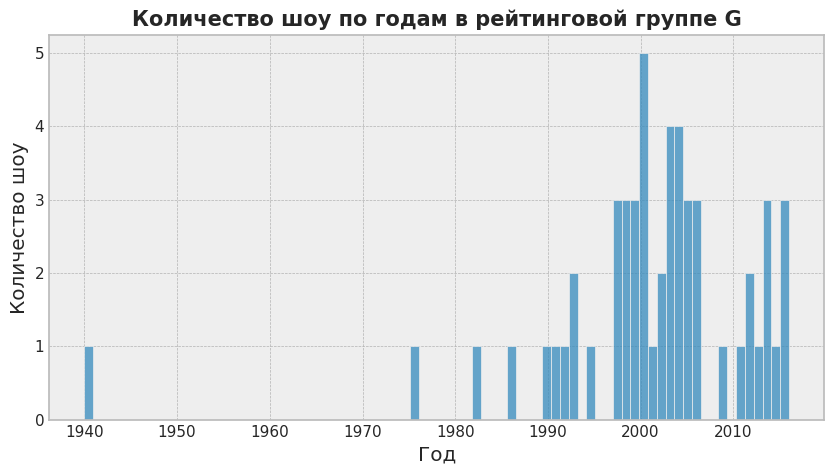

In [ ]:
# рисуем с помощью библиотеки seaborn
plt.figure(figsize=(10, 5))
plt.style.use('bmh')
sns.histplot(data=data_G,# какой датафрейм используем
             x='release year', # какую переменную отрисовываем
            bins = 80);  # на сколько ячеек разбиваем
plt.title('Количество шоу по годам в рейтинговой группе G', fontweight='bold', fontsize=15)
plt.xlabel('Год')
plt.ylabel('Количество шоу')
plt.show()

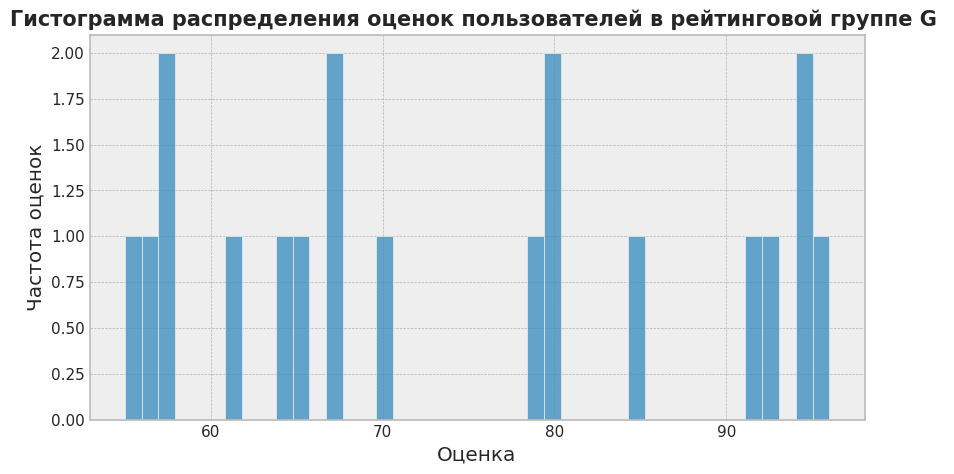

In [ ]:
# рисуем с помощью библиотеки seaborn
plt.figure(figsize=(10, 5))
plt.style.use('bmh')
sns.histplot(data=data_G,# какой датафрейм используем
             x='user rating score', # какую переменную отрисовываем
            bins = 42);  # на сколько ячеек разбиваем
plt.title('Гистограмма распределения оценок пользователей в рейтинговой группе G ', fontweight='bold', fontsize=15)
plt.xlabel('Оценка')
plt.ylabel('Частота оценок')
plt.show()

In [ ]:
# Посмотрим количество запущенных шоу от года в рйтинговой группе G
data2=data[data['rating']=='G'].groupby('rating')['title','release year','user rating score'].value_counts()
data2

<ipython-input-114-b0385ae249ca>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data2=data[data['rating']=='G'].groupby('rating')['title','release year','user rating score'].value_counts()


rating  title                                   release year  user rating score
G       An American Tail                        1986          67.0                 1
        FernGully: The Last Rainforest          1992          70.0                 1
        The Emperor's New Groove                2000          95.0                 1
        Tarzan                                  1999          95.0                 1
        Secret of the Wings                     2012          65.0                 1
        Mulan 2                                 2004          85.0                 1
        Homeward Bound: The Incredible Journey  1993          96.0                 1
        Hannah Montana: The Movie               2009          56.0                 1
        Growing Up Wild                         2016          80.0                 1
        Fantasia                                1940          61.0                 1
        An Extremely Goofy Movie                1999          67.0    

In [ ]:
data3=data2.to_frame()
data3

0
rating title                                  release year user rating score   
G      An American Tail                       1986         67.0               1
       FernGully: The Last Rainforest         1992         70.0               1
       The Emperor's New Groove               2000         95.0               1
       Tarzan                                 1999         95.0               1
       Secret of the Wings                    2012         65.0               1
       Mulan 2                                2004         85.0               1
       Homeward Bound: The Incredible Journey 1993         96.0               1
       Hannah Montana: The Movie              2009         56.0               1
       Growing Up Wild                        2016         80.0               1
       Fantasia                               1940         61.0               1
       An Extremely Goofy Movie               1999         67.0               1
       Curious George                         2006         55.0               1
       Chicken Run                            2000         80.0               1
       Chicken Little                         2005         92.0               1
       Brother Bear 2                         2006         57.0               1
       Balto                                  1995         64.0               1
       Atlantis: Milo's Return                2003         79.0               1
       Anastasia                              1997         93.0               1
       The Pirate Fairy                       2014         57.0               1

In [ ]:
data4=data3.reset_index()
data4

,rating,title,release year,user rating score,0
0,G,An American Tail,1986,67.0,1
1,G,FernGully: The Last Rainforest,1992,70.0,1
2,G,The Emperor's New Groove,2000,95.0,1
3,G,Tarzan,1999,95.0,1
4,G,Secret of the Wings,2012,65.0,1
5,G,Mulan 2,2004,85.0,1
6,G,Homeward Bound: The Incredible Journey,1993,96.0,1
7,G,Hannah Montana: The Movie,2009,56.0,1
8,G,Growing Up Wild,2016,80.0,1
9,G,Fantasia,1940,61.0,1


In [ ]:
data4.describe()

,release year,user rating score,0
count,19.000000,19.000000,19.0
mean,1998.736842,74.421053,1.0
std,16.182439,14.893383,0.0
min,1940.000000,55.000000,1.0
25%,1996.000000,62.500000,1.0
50%,2000.000000,70.000000,1.0
75%,2006.000000,88.500000,1.0
max,2016.000000,96.000000,1.0


In [ ]:
data4.sort_values(by='release year')

,rating,title,release year,user rating score,0
9,G,Fantasia,1940,61.0,1
0,G,An American Tail,1986,67.0,1
1,G,FernGully: The Last Rainforest,1992,70.0,1
6,G,Homeward Bound: The Incredible Journey,1993,96.0,1
15,G,Balto,1995,64.0,1
17,G,Anastasia,1997,93.0,1
10,G,An Extremely Goofy Movie,1999,67.0,1
3,G,Tarzan,1999,95.0,1
12,G,Chicken Run,2000,80.0,1
2,G,The Emperor's New Groove,2000,95.0,1


In [ ]:
# data4['user rating score'] = data4['user rating sore'].astype (float)
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             19 non-null     object 
 1   title              19 non-null     object 
 2   release year       19 non-null     int64  
 3   user rating score  19 non-null     float64
 4   0                  19 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 888.0+ bytes


In [ ]:
data_G_sort=data_G.sort_values(by='release year')
data_G_sort

,title,rating,ratingLevel,release year,user rating score
412,Fantasia,G,General Audiences. Suitable for all ages.,1940,61.0
270,The Smurfs and the Magic Flute,G,General Audiences. Suitable for all ages.,1976,NaN
423,The Last Unicorn,G,General Audiences. Suitable for all ages.,1982,NaN
413,An American Tail,G,General Audiences. Suitable for all ages.,1986,67.0
426,Jetsons: The Movie,G,General Audiences. Suitable for all ages.,1990,NaN
422,An American Tail: Fievel Goes West,G,General Audiences. Suitable for all ages.,1991,NaN
444,FernGully: The Last Rainforest,G,General Audiences. Suitable for all ages.,1992,70.0
271,We're Back! A Dinosaur's Story,G,General Audiences. Suitable for all ages.,1993,NaN
396,Homeward Bound: The Incredible Journey,G,General Audiences. Suitable for all ages.,1993,96.0
417,Balto,G,General Audiences. Suitable for all ages.,1995,64.0


[Text(0.5, 1.0, 'Оценки шоу в рейтинговой группе G по годам выхода шоу '),
 Text(0.5, 0, 'Год выход шоу'),
 Text(0, 0.5, 'Оценка')]

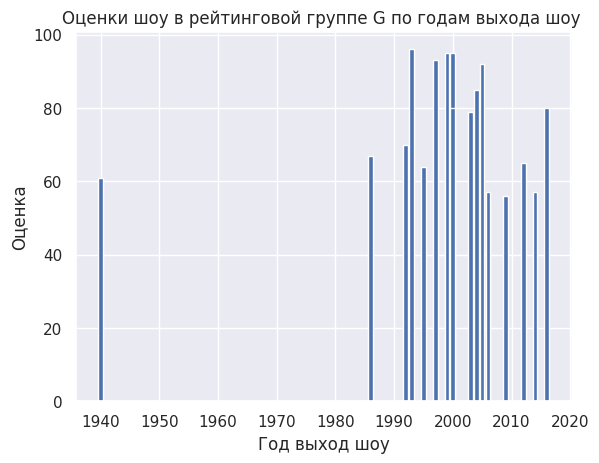

In [ ]:
fig, ax = plt.subplots()
ax.bar(data_G['release year'],data_G['user rating score'])
# plot – линия
# scatter – точечный график
# bar – столбчатая диаграмма
# barh – горизонтальная столбчатая диаграмма
# boxplot – ящик с усами
# fill_between – заливка между 2 линиями
# pie – круговая диаграмма
# hist - гистограмма
# hexbin – гексогональная 2-d гистограмм
ax.set(title='Оценки шоу в рейтинговой группе G по годам выхода шоу ',
xlabel = 'Год выход шоу', ylabel='Оценка')

[Text(0.5, 1.0, 'Оценки шоу в рейтинговой группе G '),
 Text(0.5, 0, 'Оценки'),
 Text(0, 0.5, 'Название шоу')]

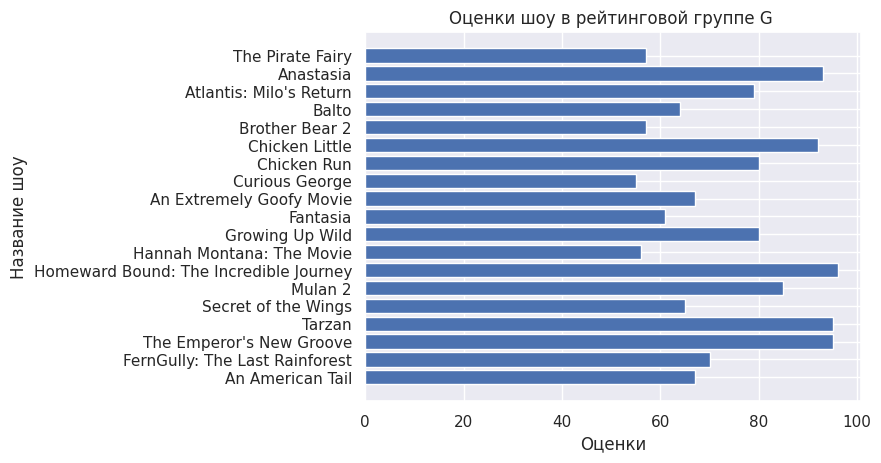

In [ ]:
fig, ax = plt.subplots()
ax.barh(data4['title'],data4['user rating score'])
# plot – линия
# scatter – точечный график
# bar – столбчатая диаграмма
# barh – горизонтальная столбчатая диаграмма
# boxplot – ящик с усами
# fill_between – заливка между 2 линиями
# pie – круговая диаграмма
# hist - гистограмма
# hexbin – гексогональная 2-d гистограмм
ax.set(title='Оценки шоу в рейтинговой группе G ',
xlabel = 'Оценки', ylabel='Название шоу')

In [ ]:
data4.describe()

,release year,user rating score,0
count,19.000000,19.000000,19.0
mean,1998.736842,74.421053,1.0
std,16.182439,14.893383,0.0
min,1940.000000,55.000000,1.0
25%,1996.000000,62.500000,1.0
50%,2000.000000,70.000000,1.0
75%,2006.000000,88.500000,1.0
max,2016.000000,96.000000,1.0


In [ ]:
data_G.median()

<ipython-input-209-4da717cbe1f3>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_G.median()


release year         2002.0
user rating score      70.0
dtype: float64

<Axes: >

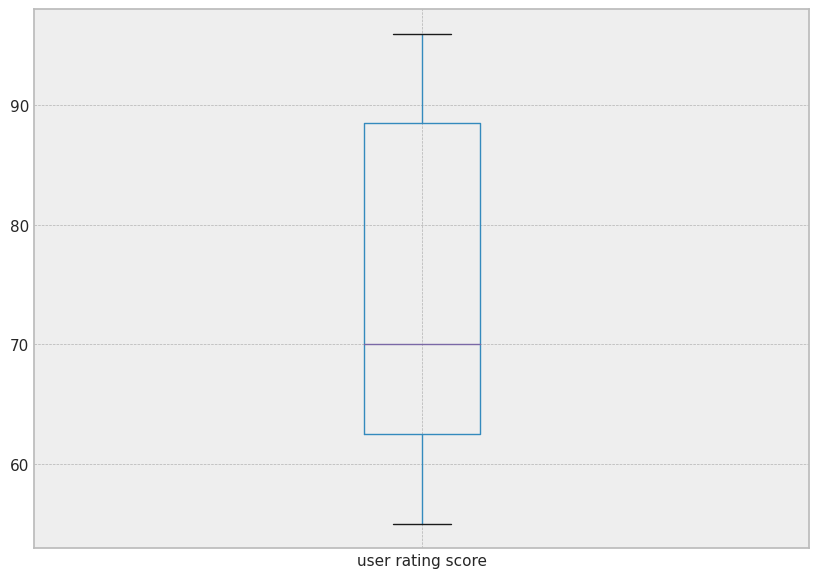

In [ ]:
# Посмотрим на выбросы с помощью ящика с усами (boxplot)
data_G[['user rating score']].boxplot(figsize = (10, 7))

<Axes: >

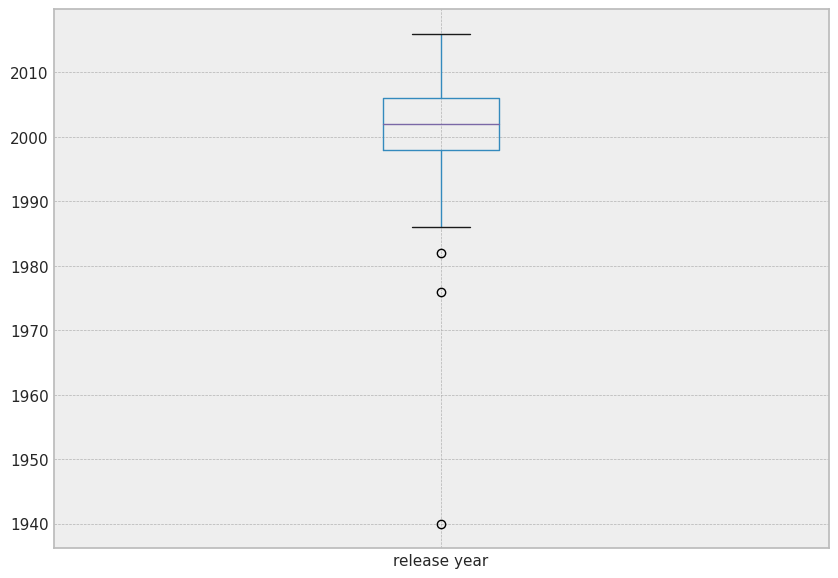

In [ ]:
# Посмотрим на выбросы с помощью ящика с усами (boxplot)
data_G[['release year']].boxplot(figsize = (10, 7))

In [ ]:
data_G_v=pd.concat([
    data_G[data_G['release year'] == 1940]['user rating score'].describe(),
    data_G[data['release year'] == 1976]['user rating score'].describe(),
    data_G[data['release year'] == 1982]['user rating score'].describe(),
    data_G[data['release year'] == 1986]['user rating score'].describe()]
                   , axis=1, keys=['1940', '1976','1982','1986'])
data_G_v

<ipython-input-219-e846f52a12b2>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_G[data['release year'] == 1976]['user rating score'].describe(),
<ipython-input-219-e846f52a12b2>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_G[data['release year'] == 1982]['user rating score'].describe(),
<ipython-input-219-e846f52a12b2>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_G[data['release year'] == 1986]['user rating score'].describe()]


,1940,1976,1982,1986
count,1.0,0.0,0.0,1.0
mean,61.0,NaN,NaN,67.0
std,NaN,NaN,NaN,NaN
min,61.0,NaN,NaN,67.0
25%,61.0,NaN,NaN,67.0
50%,61.0,NaN,NaN,67.0
75%,61.0,NaN,NaN,67.0
max,61.0,NaN,NaN,67.0


In [ ]:
data_G[data_G['release year']==1940]

,title,rating,ratingLevel,release year,user rating score
412,Fantasia,G,General Audiences. Suitable for all ages.,1940,61.0


In [ ]:
data_G[data_G['release year']==1976]

,title,rating,ratingLevel,release year,user rating score
270,The Smurfs and the Magic Flute,G,General Audiences. Suitable for all ages.,1976,NaN


In [ ]:
data_G[data_G['release year']==1982]

,title,rating,ratingLevel,release year,user rating score
423,The Last Unicorn,G,General Audiences. Suitable for all ages.,1982,NaN


Выбросы по годам в рейтинговой группе G:

* 1940 (Fantasia)(https://ru.wikipedia.org/wiki/%D0%A4%D0%B0%D0%BD%D1%82%D0%B0%D0%B7%D0%B8%D1%8F_(%D0%BC%D1%83%D0%BB%D1%8C%D1%82%D1%84%D0%B8%D0%BB%D1%8C%D0%BC))(«Фантазия» (англ. Fantasia) — классический полнометражный музыкальный мультипликационный фильм, созданный компанией Уолта Диснея и впервые показанный 13 ноября 1940 года[6])
* 1976 (The Smurfs and the Magic Flute)(https://en.wikipedia.org/wiki/The_Smurfs_and_the_Magic_Flute) («Смурфики и волшебная флейта» ( фр . La Flûte à Six schtroumpfs , букв. «Флейта шести смурфиков ») — бельгийский анимационный фильм 1976 года со смурфиками в главной роли, снятый их создателем Пейо )
* 1982 (The Last Unicorn)(https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D1%81%D0%BB%D0%B5%D0%B4%D0%BD%D0%B8%D0%B9_%D0%B5%D0%B4%D0%B8%D0%BD%D0%BE%D1%80%D0%BE%D0%B3_(%D0%BC%D1%83%D0%BB%D1%8C%D1%82%D1%84%D0%B8%D0%BB%D1%8C%D0%BC))(«Последний единорог» (англ. The Last Unicorn) — анимированный японской студией Topcraft фентезийный мультфильм, поставленный по одноимённому классическому фэнтези-роману Питера Бигла. Был выпущен 19 ноября в 1982 году компанией Rankin/Bass Productions.)

Данные шоу существовали, после проверки в Интернете, но оценок нет за шоу 1976, 1982. Возможно были пропущены при формировании данных.

In [ ]:
data_G_sort.describe()

,release year,user rating score
count,53.000000,19.000000
mean,2000.905660,74.421053
std,12.085058,14.893383
min,1940.000000,55.000000
25%,1998.000000,62.500000
50%,2002.000000,70.000000
75%,2006.000000,88.500000
max,2016.000000,96.000000


In [ ]:
data_G.median()

<ipython-input-231-4da717cbe1f3>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_G.median()


release year         2002.0
user rating score      70.0
dtype: float64

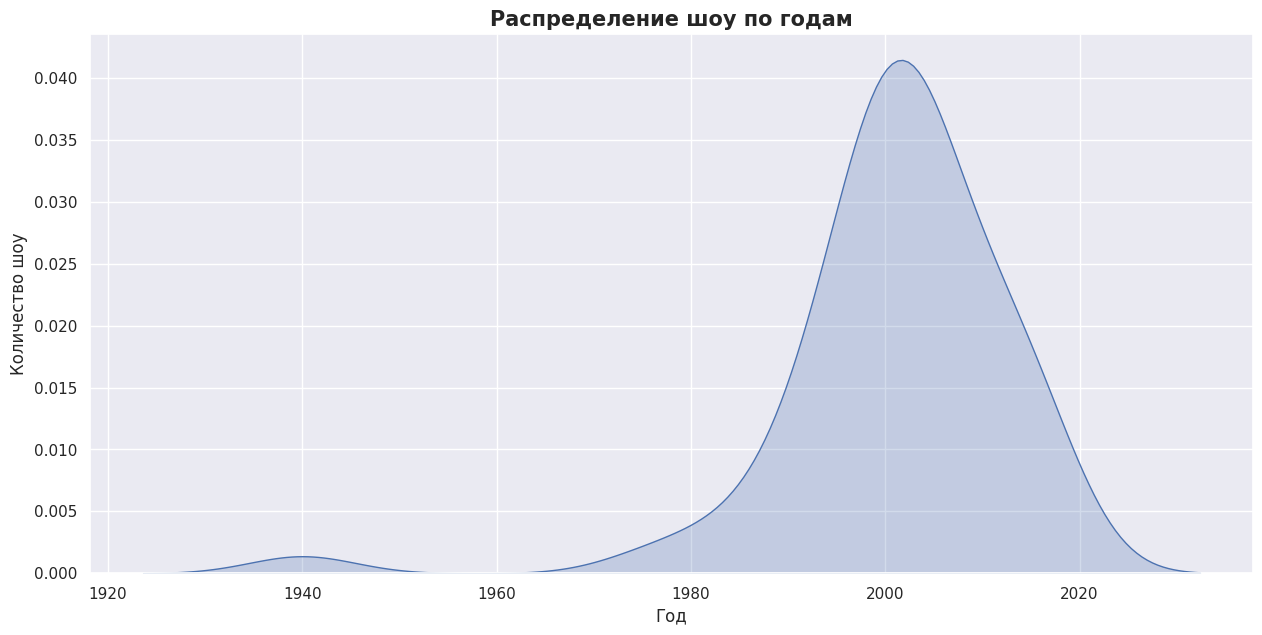

In [ ]:
plt.figure(figsize=(15, 7))
sns.set_theme(style="darkgrid")
sns.kdeplot(data=data_G['release year'], fill=True)
plt.title('Распределение шоу по годам', fontweight='bold', fontsize=15)
plt.xlabel('Год')
plt.ylabel('Количество шоу')
plt.show()

«Фантазия 2000» — полнометражный музыкальный мультфильм студии Walt Disney Feature Animation, снятый в 1999 году по системе IMAX, через 60 лет после мультфильма «Фантазия». В качестве конферансье выступили знаменитые киноактёры и телеведущие.